In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [3]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [4]:
# 한글 폰트 사용시 레이블의 '-' 기호 깨지는 현상 해결
plt.rc('axes', unicode_minus = False)  # plt.rcParams['axes.unicode_minus'] = False와 동일

## 시도별 외국인 주민 현황 <hr>

In [5]:
file = '../DATA/시도별_외국인주민_현황_20240205145225.xlsx'

In [6]:
fpopulDF = pd.read_excel(file, index_col = 0, header = [0, 1, 2, 3])
fpopulDF.head()


행정구역별(1)      2015                                                      \
행정구역별(1)   총인구 (명)   합계 (명)                 한국국적을 가지지 않은 자 (명)           
행정구역별(1)        소계       소계                                 소계           
행정구역별(1)        합계       합계      남자      여자                 합계      남자   
합계        51069375  1711013  921006  790007            1363712  788663   
서울특별시      9904312   408083  193128  214955             337116  165218   
부산광역시      3448737    58080   31275   26805              44070   26008   
대구광역시      2466052    38899   20816   18083              29282   17292   
인천광역시      2890451    89515   48571   40944              67850   40224   

행정구역별(1)                                  ...               2022          \
행정구역별(1)                                  ... 한국국적을 가지지 않은 자 (명)           
행정구역별(1)          외국인근로자                  ...             외국국적동포   기타외국인   
행정구역별(1)      여자      합계      남자      여자  ...                 여자      합계   
합계        575049  573378  430361  143017  ...             190149  586473   
서울특별시     171898  102081   59656   42425  ...              52678  113172   
부산광역시      18062   16424   14241    2183  ...               2305   19411   
대구광역시      11990   11701    9454    2247  ...               1888   14627   
인천광역시      27626   27507   21845    5662  ...              14865   42249   

행정구역별(1)                                                                 \
행정구역별(1)                 한국국적을 취득한 자 (명)                외국인주민자녀(출생) (명)   
행정구역별(1)                              소계                             소계   
행정구역별(1)      남자      여자              합계     남자      여자              합계   
합계        312427  274046          223825  46193  177632          282077   
서울특별시      54916   58256           45792  13693   32099           35550   
부산광역시       9795    9616            7061    850    6211           12653   
대구광역시       7285    7342            5249    558    4691            9586   
인천광역시      23351   18898           18888   5003   13885           17796   

행정구역별(1)                  
행정구역별(1)                  
행정구역별(1)                  
행정구역별(1)      남자      여자  
합계        144310  137767  
서울특별시      18062   17488  
부산광역시       6388    6265  
대구광역시       4857    4729  
인천광역시       9177    8619  

[5 rows x 250 columns]

In [7]:
fpopulDF.index

Index(['합계', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'],
      dtype='object')

In [8]:
fpopulDF.columns

MultiIndex([('2015',            '총인구 (명)',     '소계', '합계'),
            ('2015',             '합계 (명)',     '소계', '합계'),
            ('2015',             '합계 (명)',     '소계', '남자'),
            ('2015',             '합계 (명)',     '소계', '여자'),
            ('2015', '한국국적을 가지지 않은 자 (명)',     '소계', '합계'),
            ('2015', '한국국적을 가지지 않은 자 (명)',     '소계', '남자'),
            ('2015', '한국국적을 가지지 않은 자 (명)',     '소계', '여자'),
            ('2015', '한국국적을 가지지 않은 자 (명)', '외국인근로자', '합계'),
            ('2015', '한국국적을 가지지 않은 자 (명)', '외국인근로자', '남자'),
            ('2015', '한국국적을 가지지 않은 자 (명)', '외국인근로자', '여자'),
            ...
            ('2022', '한국국적을 가지지 않은 자 (명)', '외국국적동포', '여자'),
            ('2022', '한국국적을 가지지 않은 자 (명)',  '기타외국인', '합계'),
            ('2022', '한국국적을 가지지 않은 자 (명)',  '기타외국인', '남자'),
            ('2022', '한국국적을 가지지 않은 자 (명)',  '기타외국인', '여자'),
            ('2022',    '한국국적을 취득한 자 (명)',     '소계', '합계'),
            ('2022',    '한국국적을 취득한 자 (명)',     '소계', '남자'),
            ('2022',    

In [9]:
year_list = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
city_list = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시']
province_list = ['경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']

In [10]:
fpopulDF[('2015', '한국국적을 가지지 않은 자 (명)', '소계', '합계')]

합계         1363712
서울특별시       337116
부산광역시        44070
대구광역시        29282
인천광역시        67850
광주광역시        21592
대전광역시        19080
울산광역시        29860
세종특별자치시       4471
경기도         452632
강원특별자치도      18306
충청북도         40758
충청남도         71082
전라북도         29930
전라남도         34611
경상북도         57565
경상남도         90361
제주특별자치도      15146
Name: (2015, 한국국적을 가지지 않은 자 (명), 소계, 합계), dtype: int64

In [11]:
fpopulDF[('2015', '한국국적을 가지지 않은 자 (명)', '소계', '합계')].loc['서울특별시':'세종특별자치시']

서울특별시      337116
부산광역시       44070
대구광역시       29282
인천광역시       67850
광주광역시       21592
대전광역시       19080
울산광역시       29860
세종특별자치시      4471
Name: (2015, 한국국적을 가지지 않은 자 (명), 소계, 합계), dtype: int64

In [12]:
fpopulDF[('2015', '한국국적을 가지지 않은 자 (명)', '소계', '합계')]

합계         1363712
서울특별시       337116
부산광역시        44070
대구광역시        29282
인천광역시        67850
광주광역시        21592
대전광역시        19080
울산광역시        29860
세종특별자치시       4471
경기도         452632
강원특별자치도      18306
충청북도         40758
충청남도         71082
전라북도         29930
전라남도         34611
경상북도         57565
경상남도         90361
제주특별자치도      15146
Name: (2015, 한국국적을 가지지 않은 자 (명), 소계, 합계), dtype: int64

In [13]:
# start = ('2015', '한국국적을 가지지 않은 자 (명)', '소계', '합계')
# end = ('2022', '한국국적을 가지지 않은 자 (명)', '소계', '합계')
# fpopulDF.loc[('합계',), start : end]

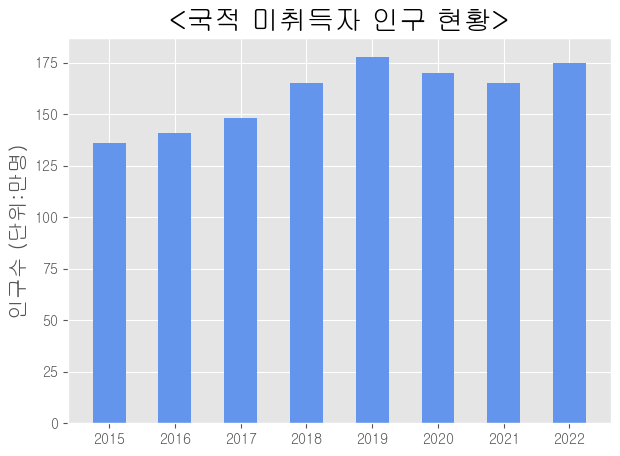

In [190]:
# 한국국적을 가지지 않은 거주 외국인 수
sum_list0 = []  # list 사용하지 않고 데이터프레임에서 값추출 해보기
year_list = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
for year in year_list:
    sum_list0.append(round(fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')]['합계'] / 10000))

plt.figure(figsize = (7, 5))
plt.bar(range(8), sum_list0, width = 0.5, color = 'cornflowerblue')
plt.title('<국적 미취득자 인구 현황>', size = 20)
plt.ylabel('인구수 (단위:만명)', size = 15)
plt.xticks(range(8), year_list)

plt.show()
    

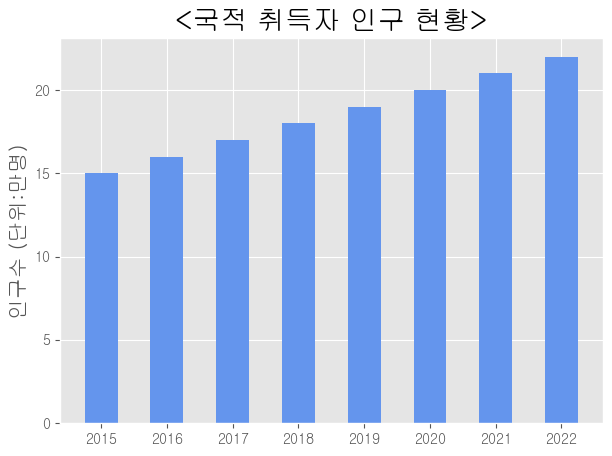

In [188]:
# 한국국적을 가진 거주 외국인 수
sum_list1 = []  # list 사용하지 않고 데이터프레임에서 값추출 해보기
year_list = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
for year in year_list:
    sum_list1.append(round(fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')]['합계'] / 10000))

plt.figure(figsize = (7, 5))
plt.bar(range(8), sum_list1, width = 0.5, color = 'cornflowerblue')
plt.title('<국적 취득자 인구 현황>', size = 20)
plt.ylabel('인구수 (단위:만명)', size = 15)
plt.xticks(range(8), year_list)

plt.show()

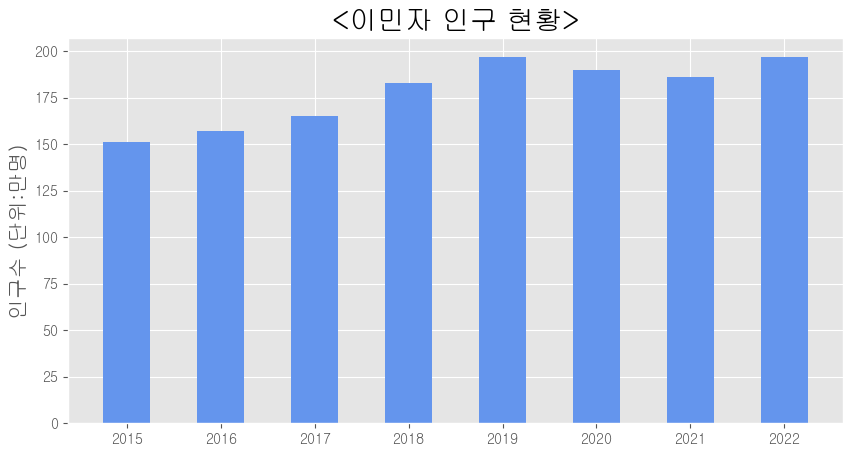

In [189]:
# 이민자 수
sum_list1 = []  # list 사용하지 않고 데이터프레임에서 값추출 해보기
year_list = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
for year in year_list:
    num_acqui = round(fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')]['합계'] / 10000)
    num_notacqui = round(fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')]['합계'] / 10000)
    sum_list1.append(num_acqui + num_notacqui)

plt.figure(figsize = (10, 5))
plt.bar(range(8), sum_list1, width = 0.5, color = 'cornflowerblue')
plt.title('<이민자 인구 현황>', size = 20)
plt.ylabel('인구수 (단위:만명)', size = 15)
plt.xticks(range(8), year_list)
plt.show()

In [17]:
fpopulDF.index

Index(['합계', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'],
      dtype='object')

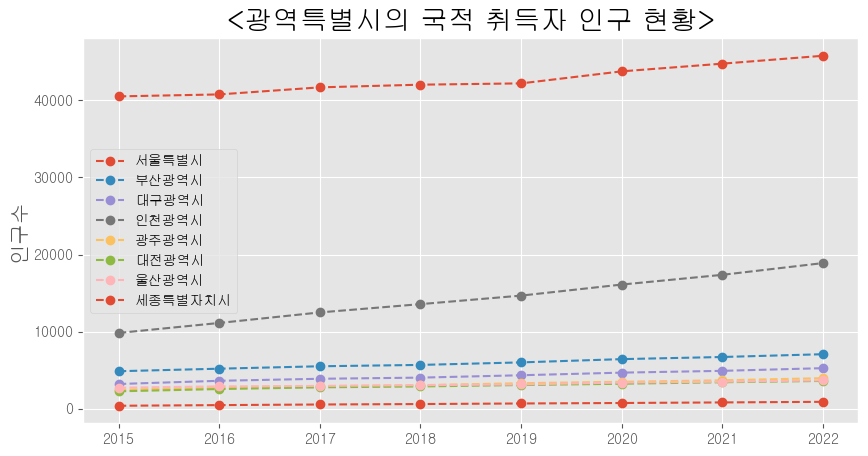

In [133]:
# 특별광역시별 한국국적을 취득한 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for city in city_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')][city])
    plt.plot(sum_list, 'o--', label = city_list[i])
    i += 1
plt.title('<광역특별시의 국적 취득자 인구 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    
    

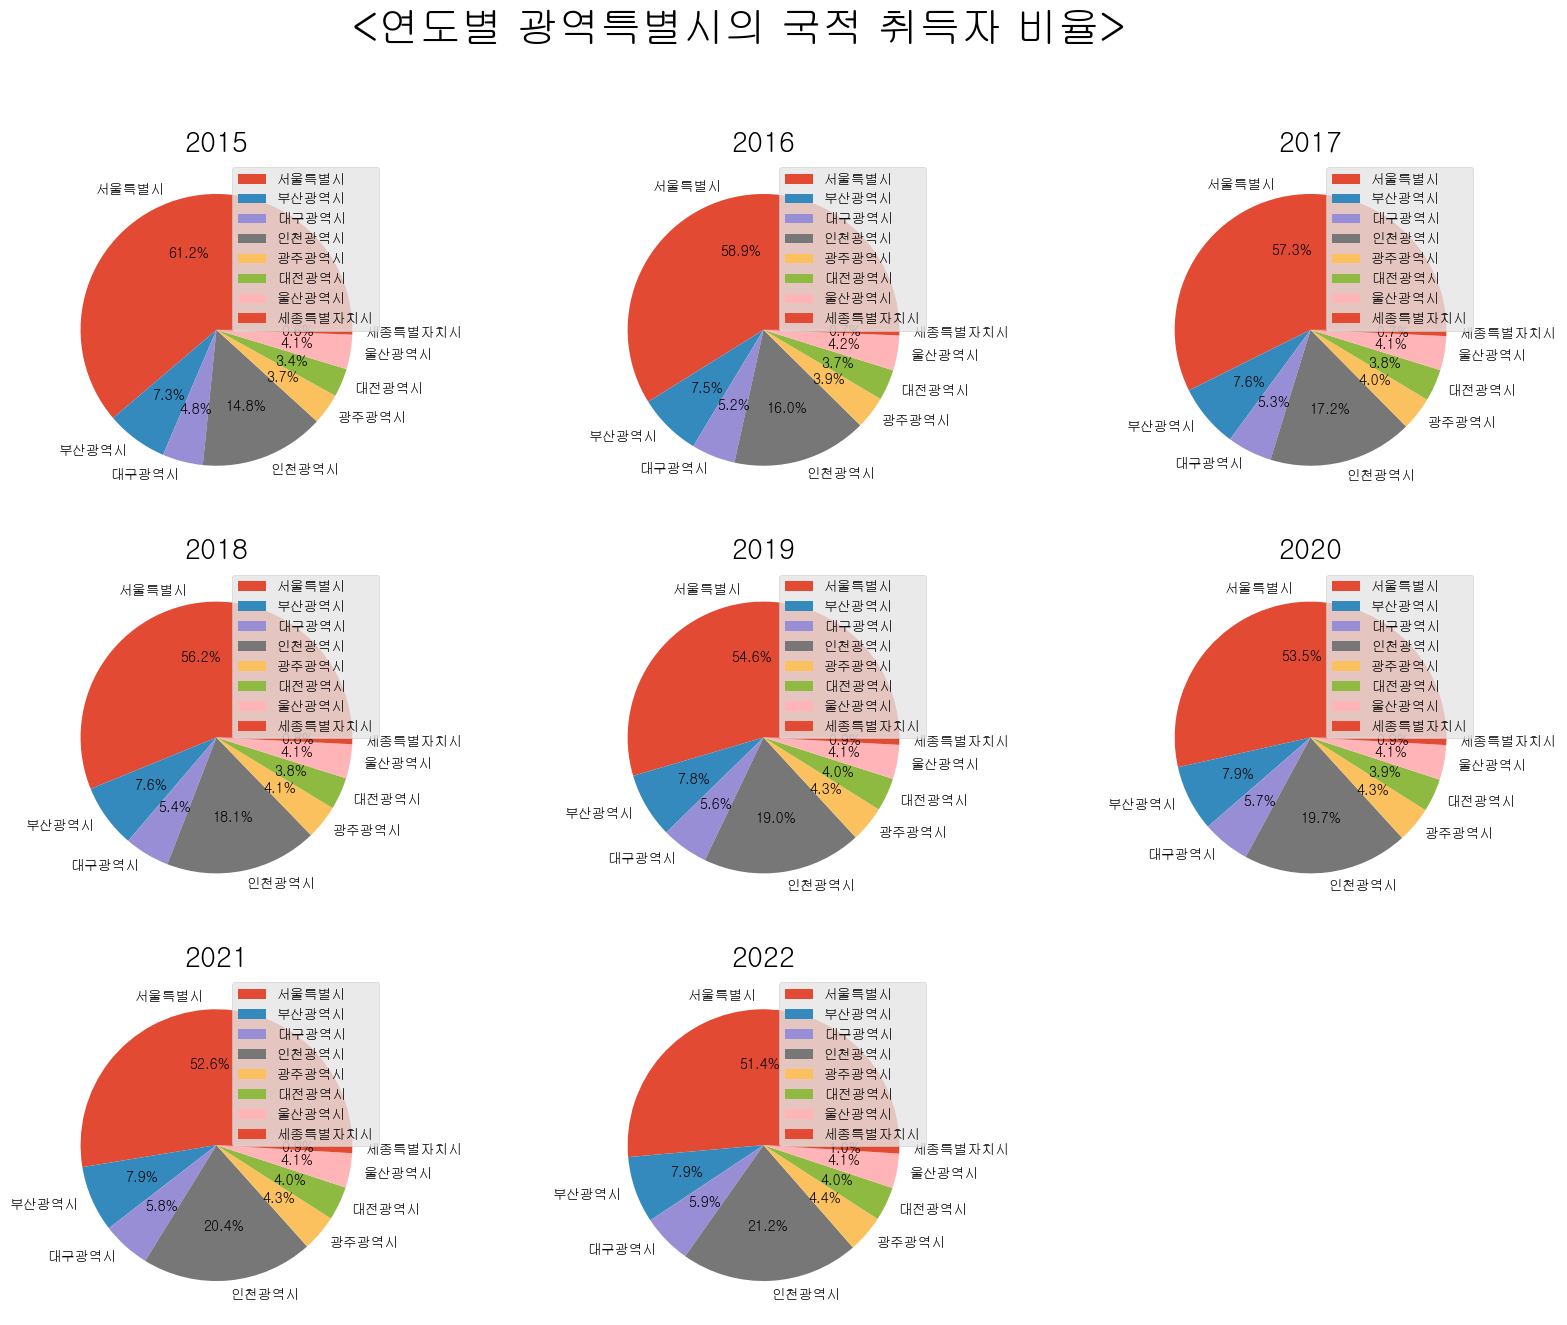

In [111]:
# 연도별 광역특별시의 한국국적을 취득한 외국인 비율

plt.figure(figsize = (20, 15))
plt.suptitle('<연도별 광역특별시의 국적 취득자 비율>', size = 30)
i = 1
for year in year_list: 
    df = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')].loc['서울특별시':'세종특별자치시']
    plt.subplot(3, 3, i)
    plt.pie(df.values, labels = df.index, autopct = '%.1f%%')
    plt.title(year, size = 20)
    i += 1
    plt.legend(loc = 'upper right')
plt.show()

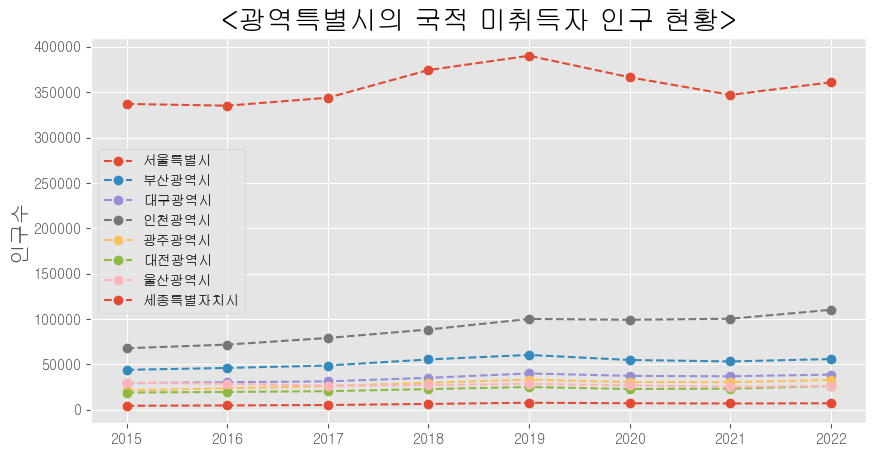

In [134]:
# 특별광역시별 국적을 가지지 않은 외국인 수

plt.figure(figsize = (10, 5))
i = 0
for city in city_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')][city])
    plt.plot(sum_list, 'o--', label = city_list[i])
    i += 1
plt.title('<광역특별시의 국적 미취득자 인구 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

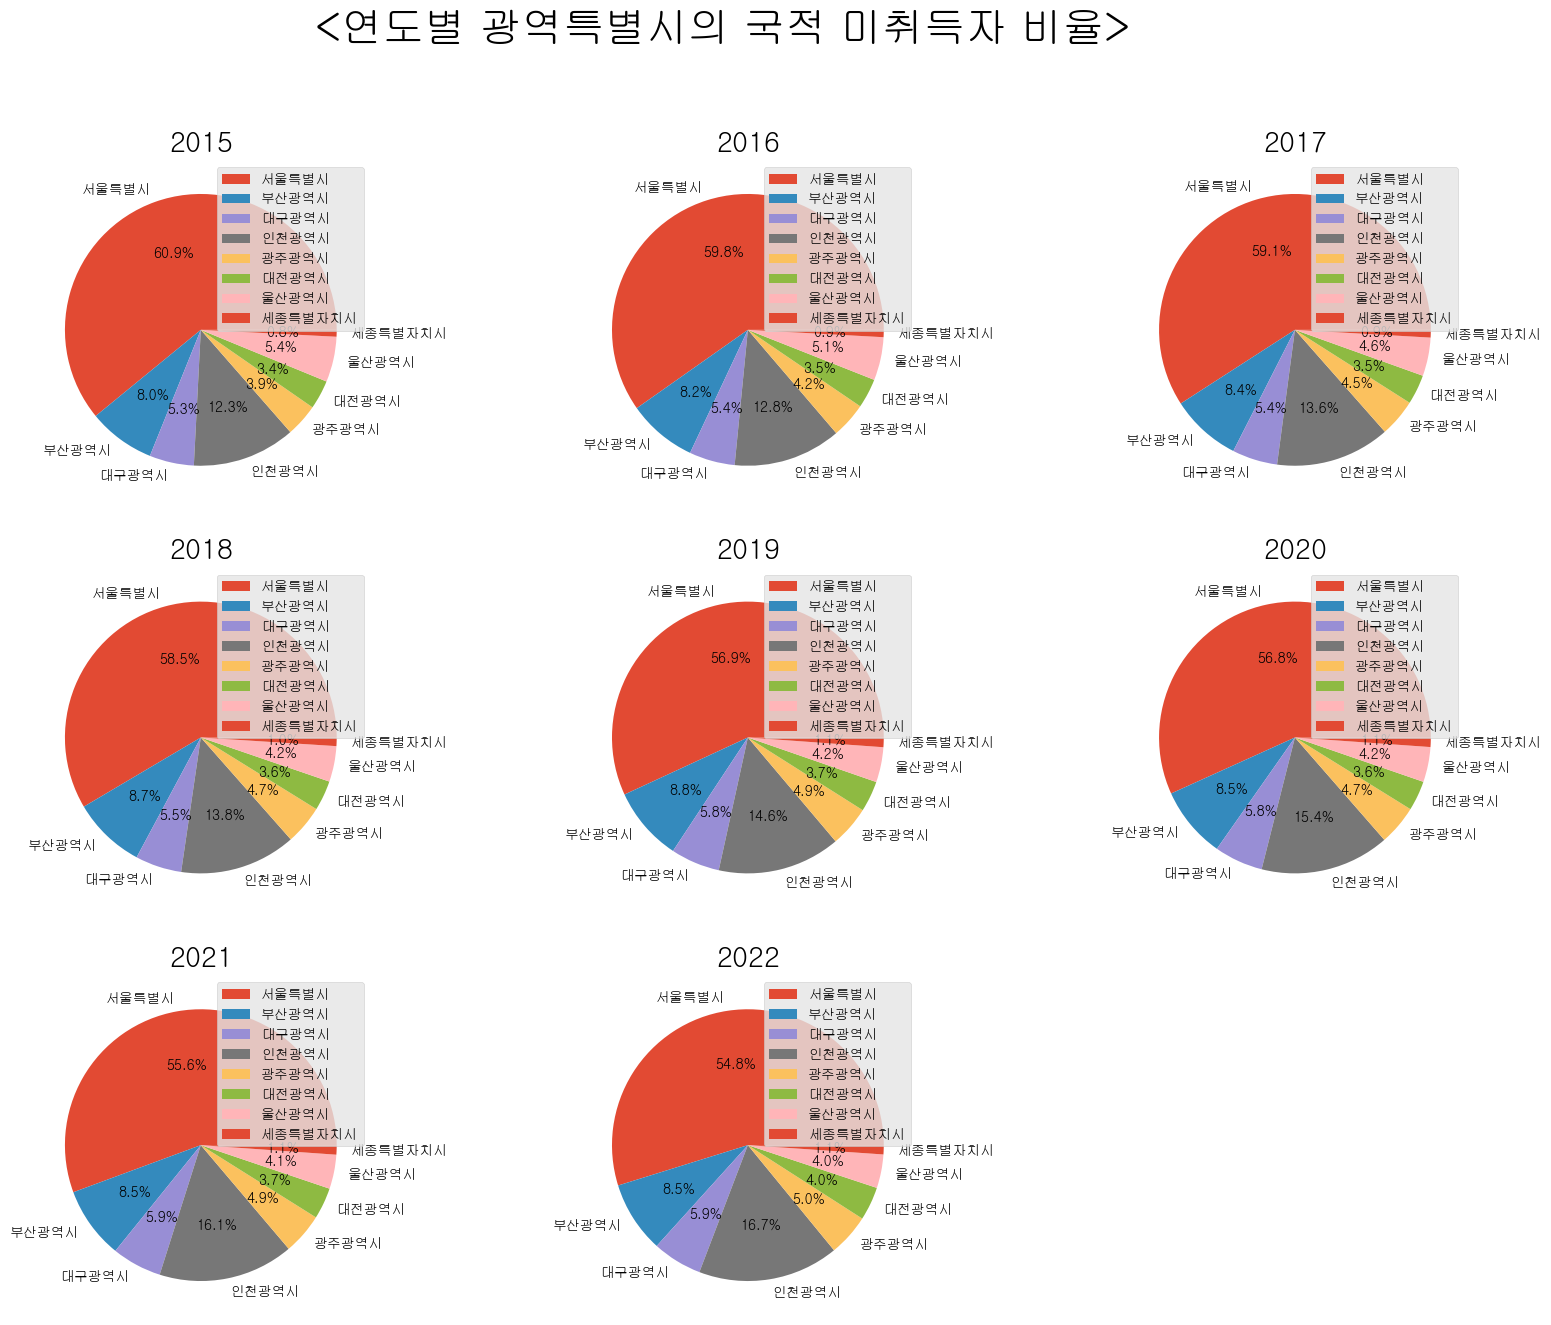

In [112]:
# 연도별 광역특별시의 한국국적을 가지지 않은 외국인 비율

plt.figure(figsize = (20, 15))
plt.suptitle('<연도별 광역특별시의 국적 미취득자 비율>', size = 30)
i = 1
for year in year_list: 
    df = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')].loc['서울특별시':'세종특별자치시']
    plt.subplot(3, 3, i)
    plt.pie(df.values, labels = df.index, autopct = '%.1f%%')
    plt.title(year, size = 20)
    i += 1
    plt.legend(loc = 'upper right')
plt.show()

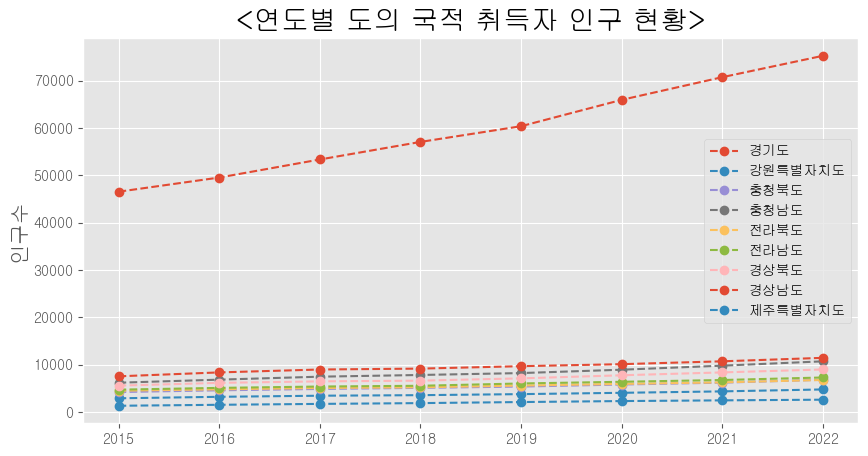

In [212]:
# 도별 한국국적을 취득한 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for province in province_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')][province])
    plt.plot(sum_list, 'o--', label = province_list[i])
    i += 1
plt.title('<연도별 도의 국적 취득자 인구 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

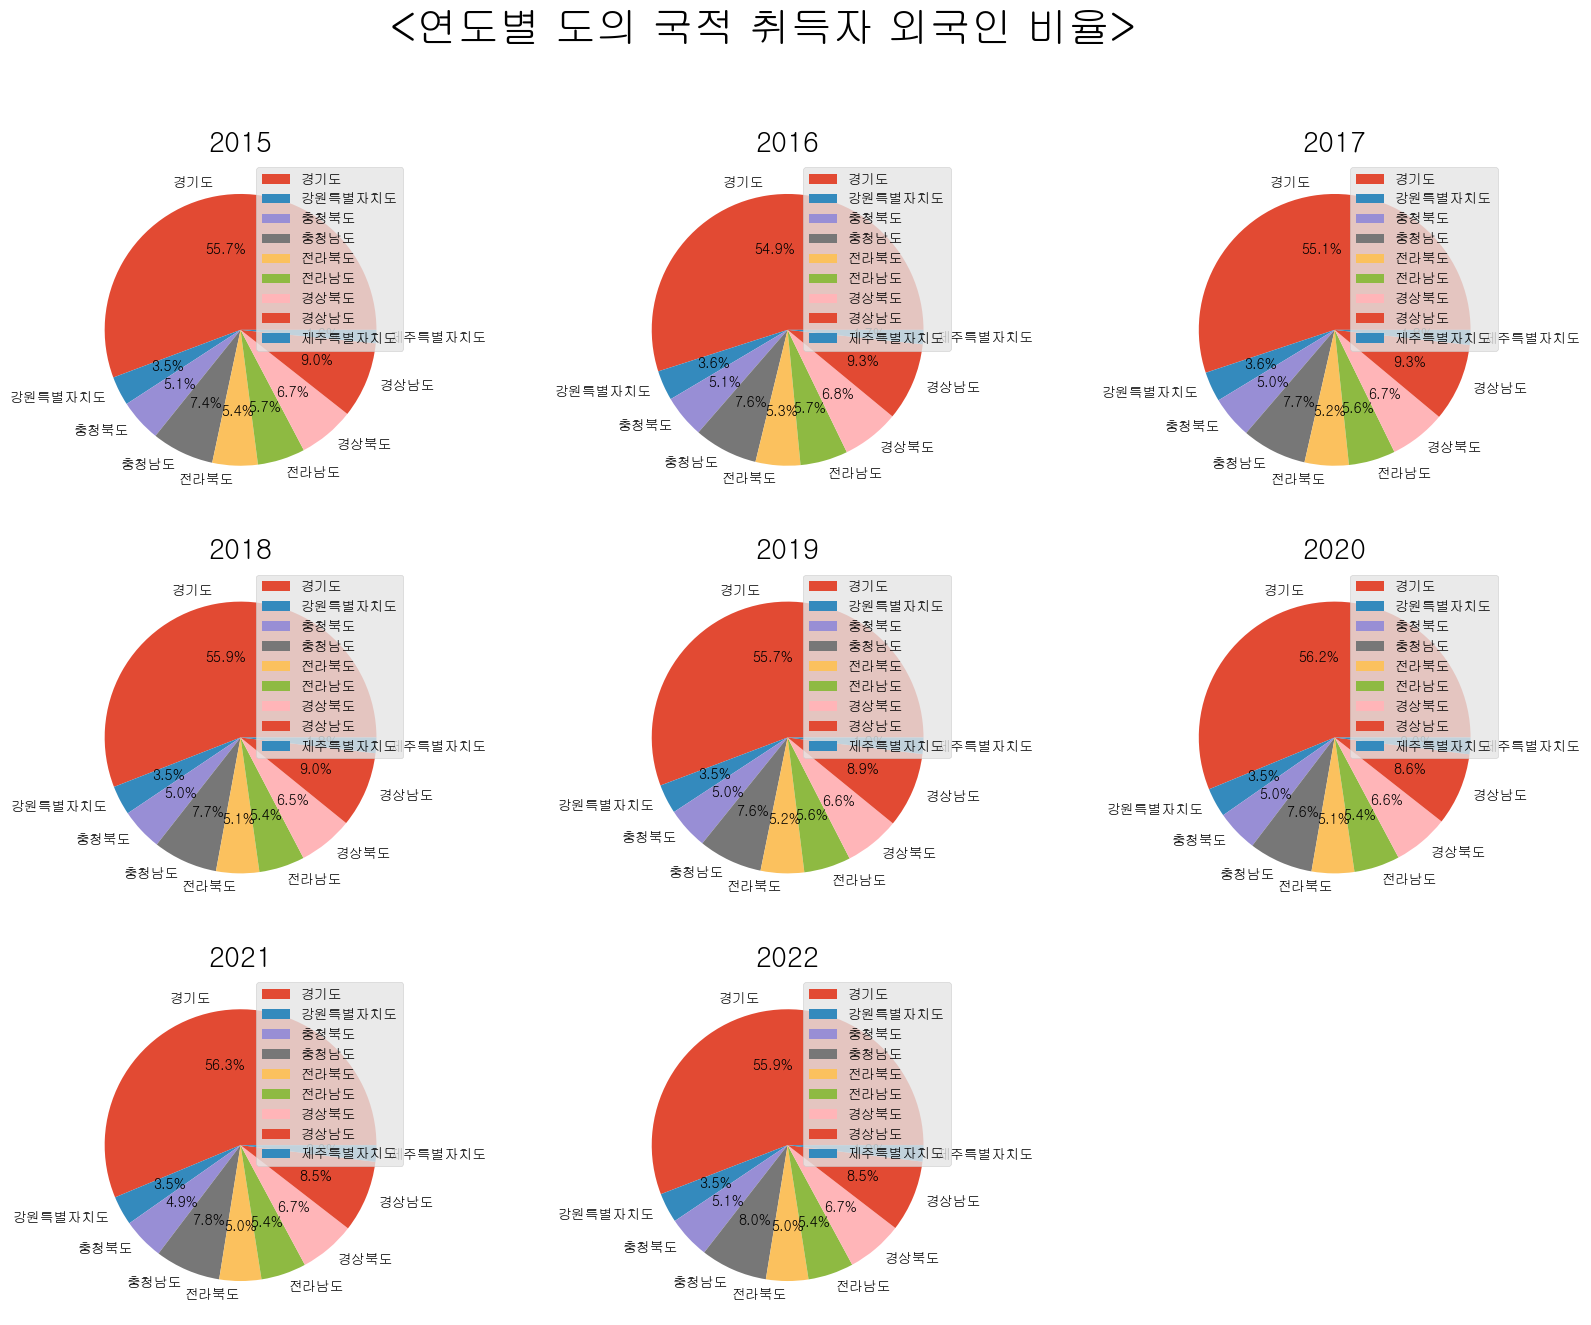

In [23]:
# 연도별 도의 한국국적을 취득한 외국인 인구비율
plt.figure(figsize = (20, 15))
plt.suptitle('<연도별 도의 국적 취득자 외국인 비율>', size = 30)
i = 1
for year in year_list: 
    df = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')].loc['경기도':'제주특별자치도']
    plt.subplot(3, 3, i)
    plt.pie(df.values, labels = df.index, autopct = '%.1f%%')
    plt.title(year, size = 20)
    i += 1
    plt.legend(loc = 'upper right')
plt.show()

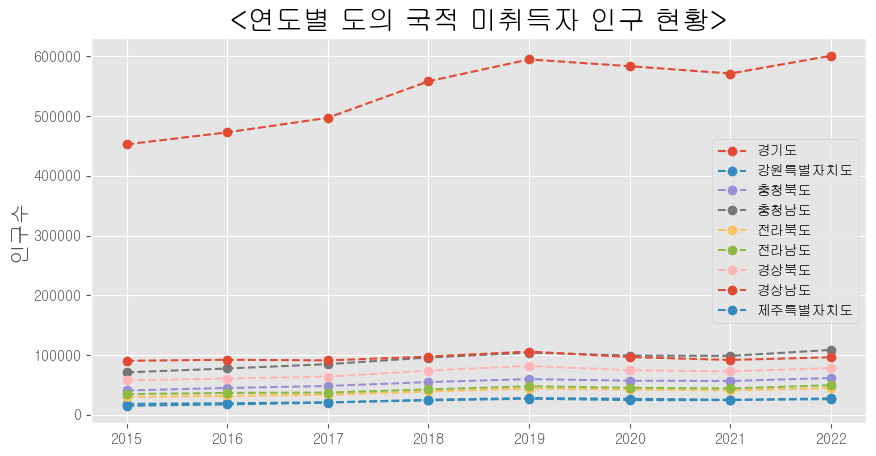

In [113]:
# 도별 한국국적을 가지지 않은 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for province in province_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')][province])
    plt.plot(sum_list, 'o--', label = province_list[i])
    i += 1
plt.title('<연도별 도의 국적 미취득자 인구 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

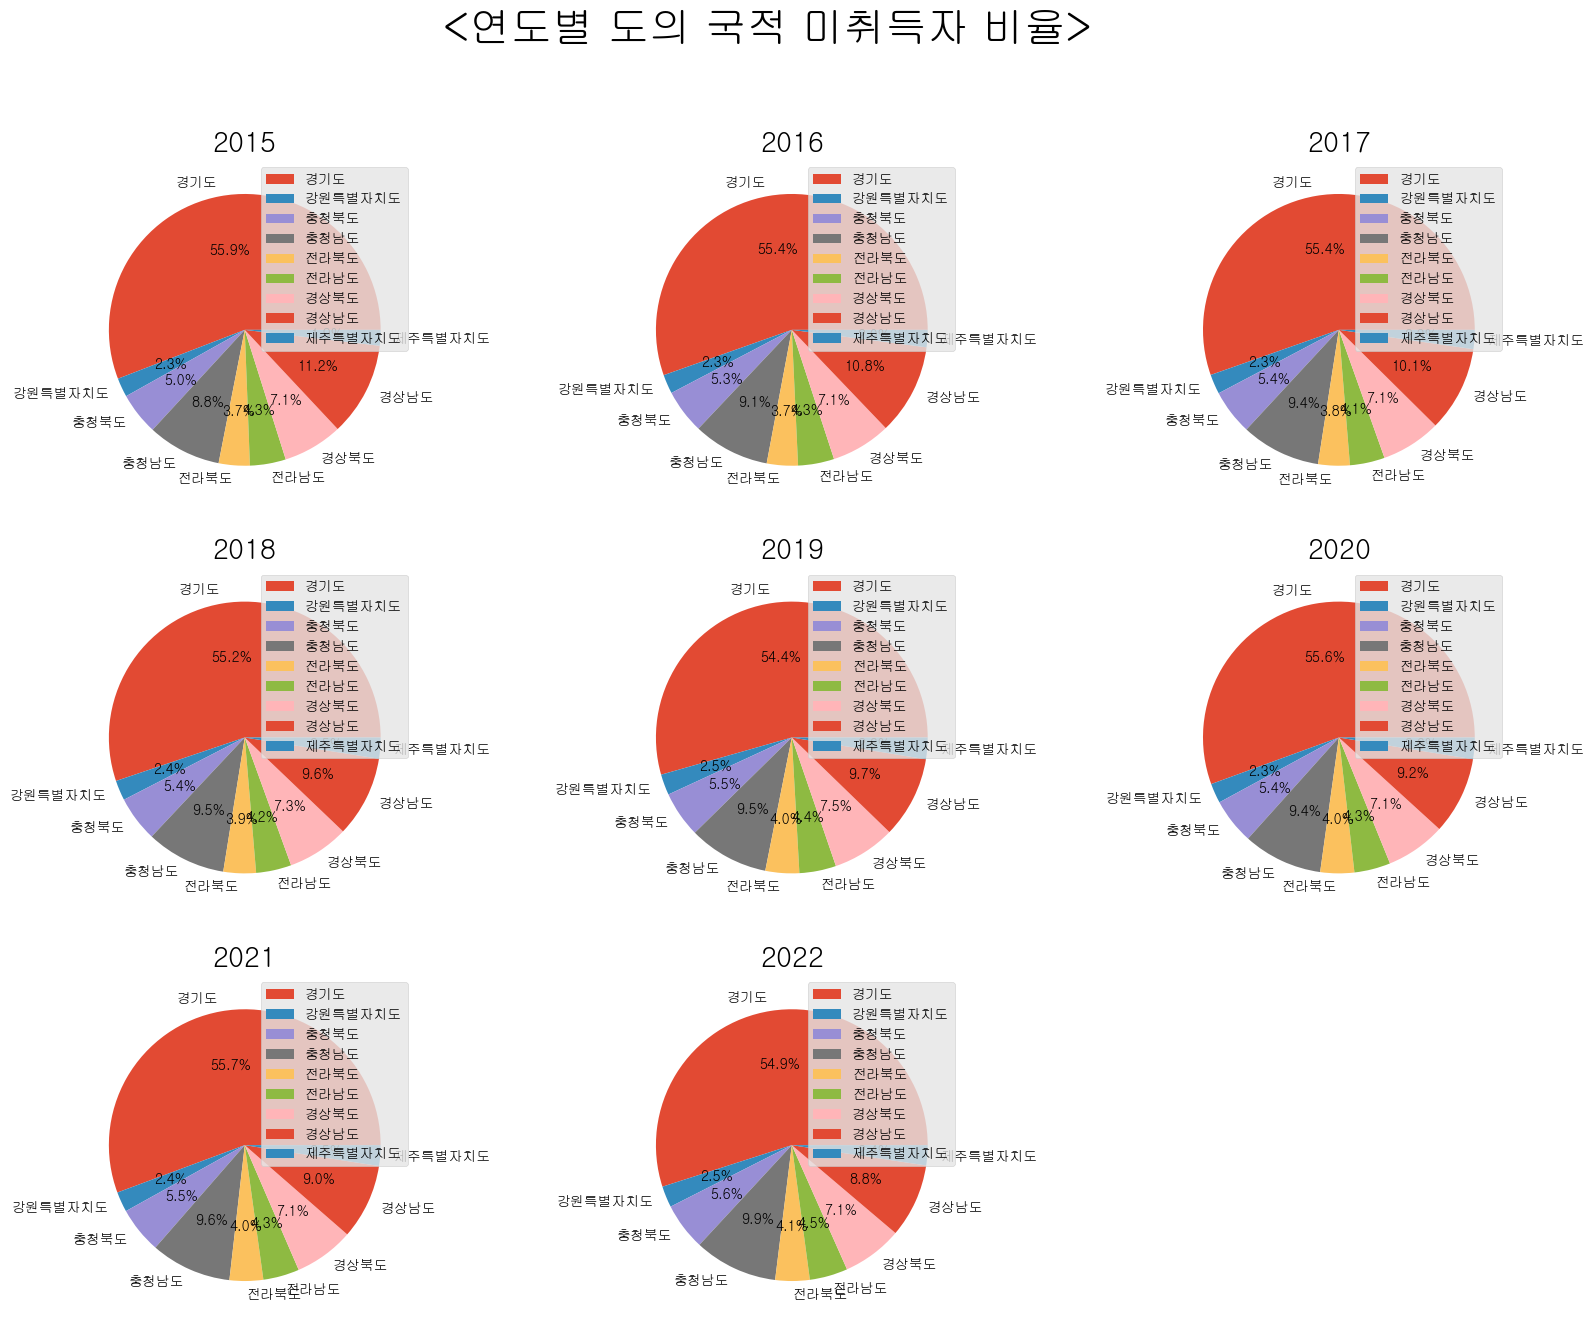

In [114]:
# 연도별 도의 한국국적을 가지지 않은 외국인 인구비율
plt.figure(figsize = (20, 15))
plt.suptitle('<연도별 도의 국적 미취득자 비율>', size = 30)
i = 1
for year in year_list: 
    df = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')].loc['경기도':'제주특별자치도']
    plt.subplot(3, 3, i)
    plt.pie(df.values, labels = df.index, autopct = '%.1f%%')
    plt.title(year, size = 20)
    i += 1
    plt.legend(loc = 'upper right')
plt.show()

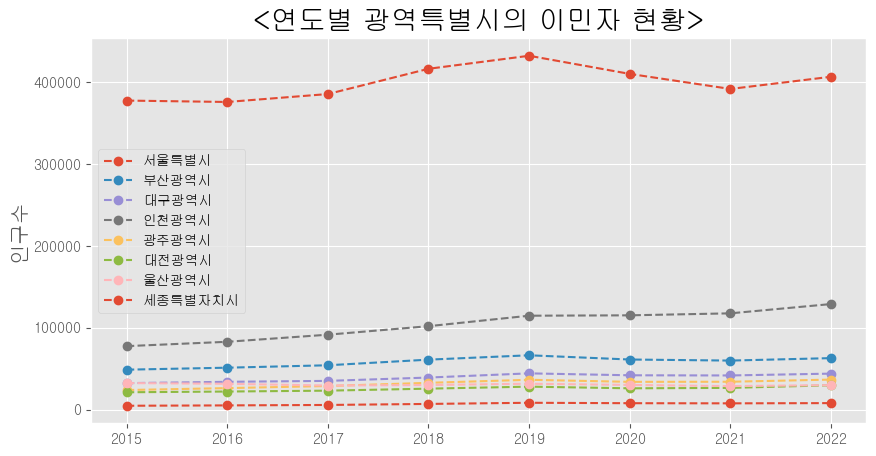

In [120]:
# 광역특별시 국적 취득자 + 미취득자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for city in city_list:
    sum_list = []
    for year in year_list:
        num_acqui = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')][city]
        num_notacqui = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')][city]
        sum_list.append(num_acqui + num_notacqui)
    plt.plot(sum_list, 'o--', label = city_list[i])
    i += 1
plt.title('<연도별 광역특별시의 이민자 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

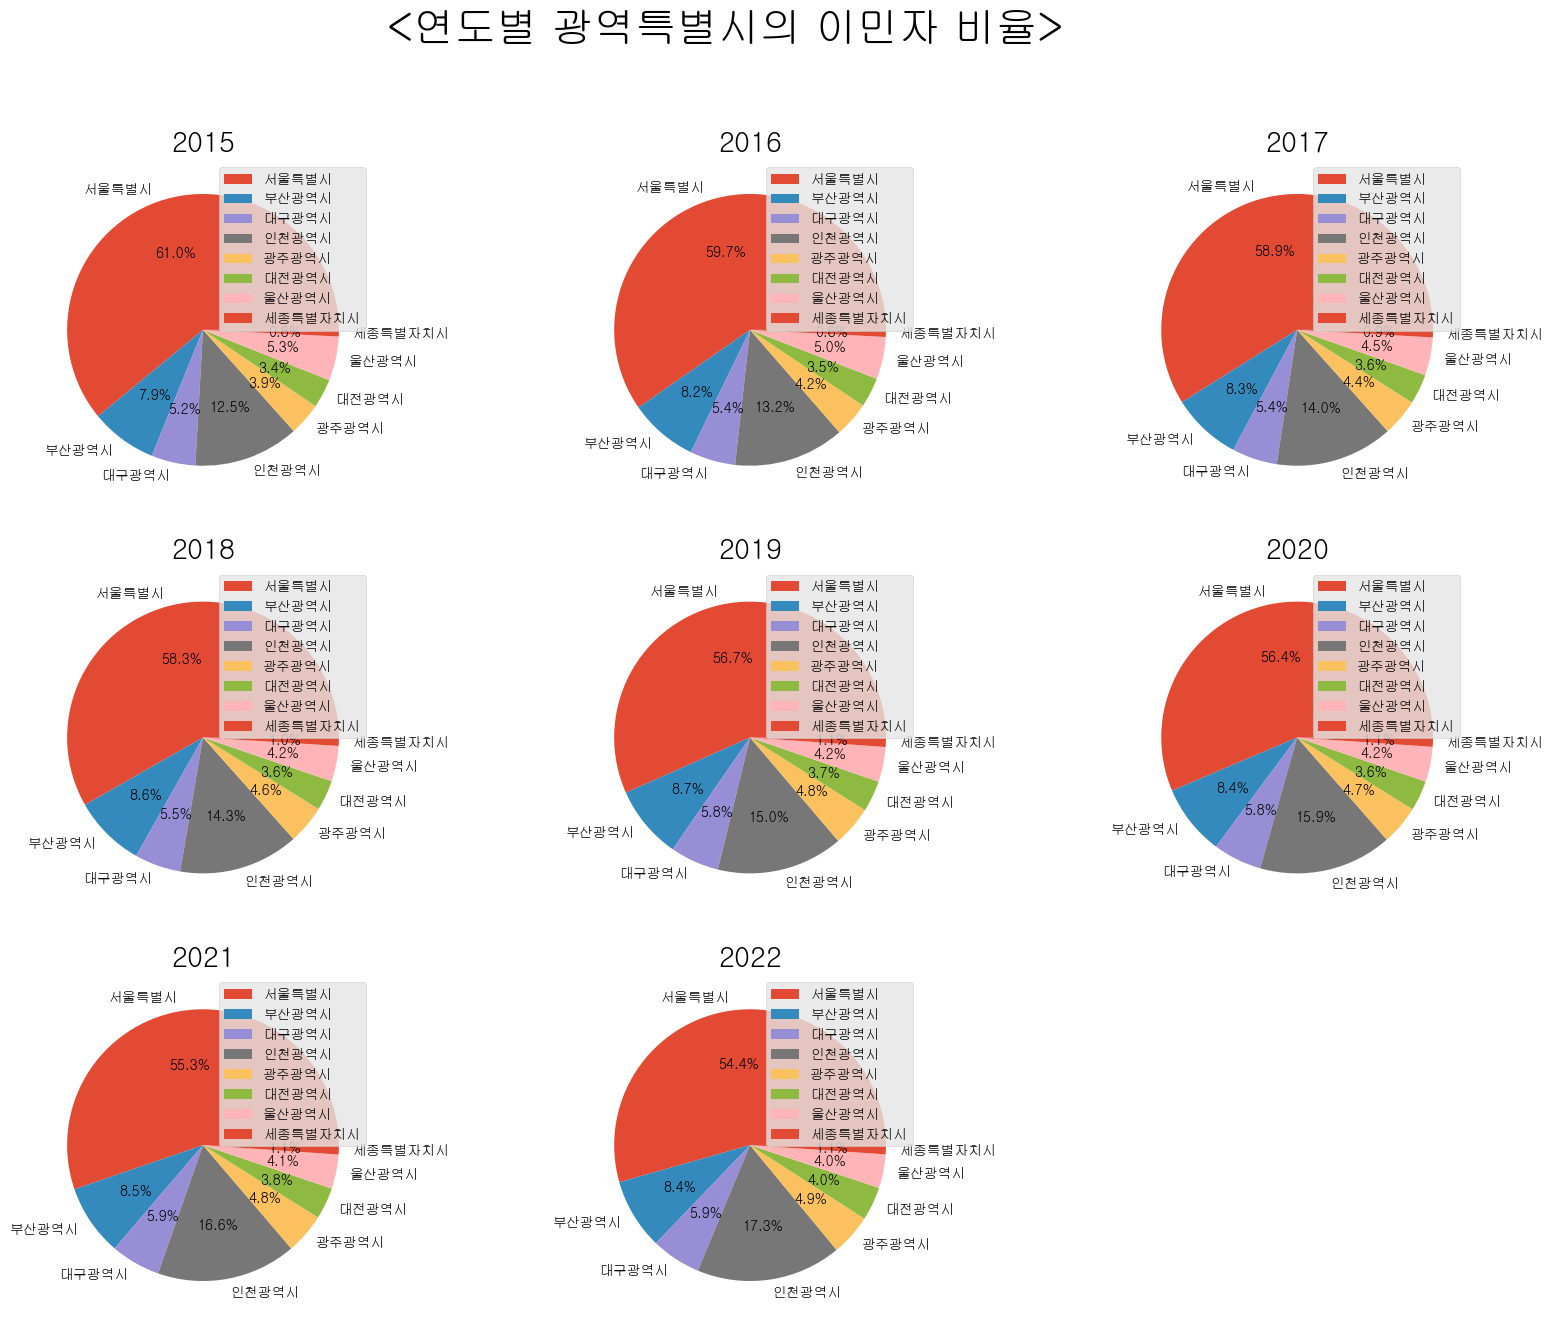

In [116]:
# 광역특별시 국적 취득자 + 미취득자 외국인 비율

plt.figure(figsize = (20, 15))
plt.suptitle('<연도별 광역특별시의 이민자 비율>', size = 30)
i = 1
for year in year_list:
    acqui_df = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')].loc['서울특별시':'세종특별자치시']
    notacqui_df = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')].loc['서울특별시':'세종특별자치시']
    df = acqui_df + notacqui_df
    plt.subplot(3, 3, i)
    plt.pie(df.values, labels = df.index, autopct = '%.1f%%')
    plt.title(year, size = 20)
    i += 1
    plt.legend(loc = 'upper right')
plt.show()

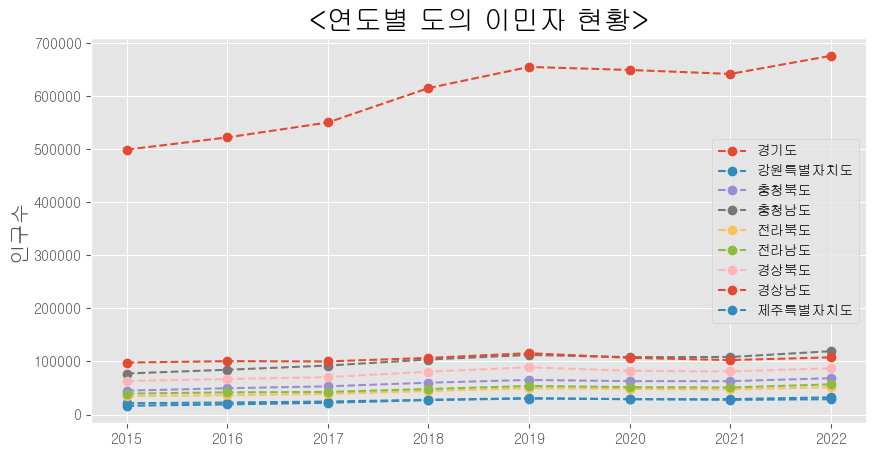

In [121]:
# 도 국적 취득자 + 미취득자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for province in province_list:
    sum_list = []
    for year in year_list:
        num_acqui = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')][province]
        num_notacqui = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')][province]
        sum_list.append(num_acqui + num_notacqui)
    plt.plot(sum_list, 'o--', label = province_list[i])
    i += 1
plt.title('<연도별 도의 이민자 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

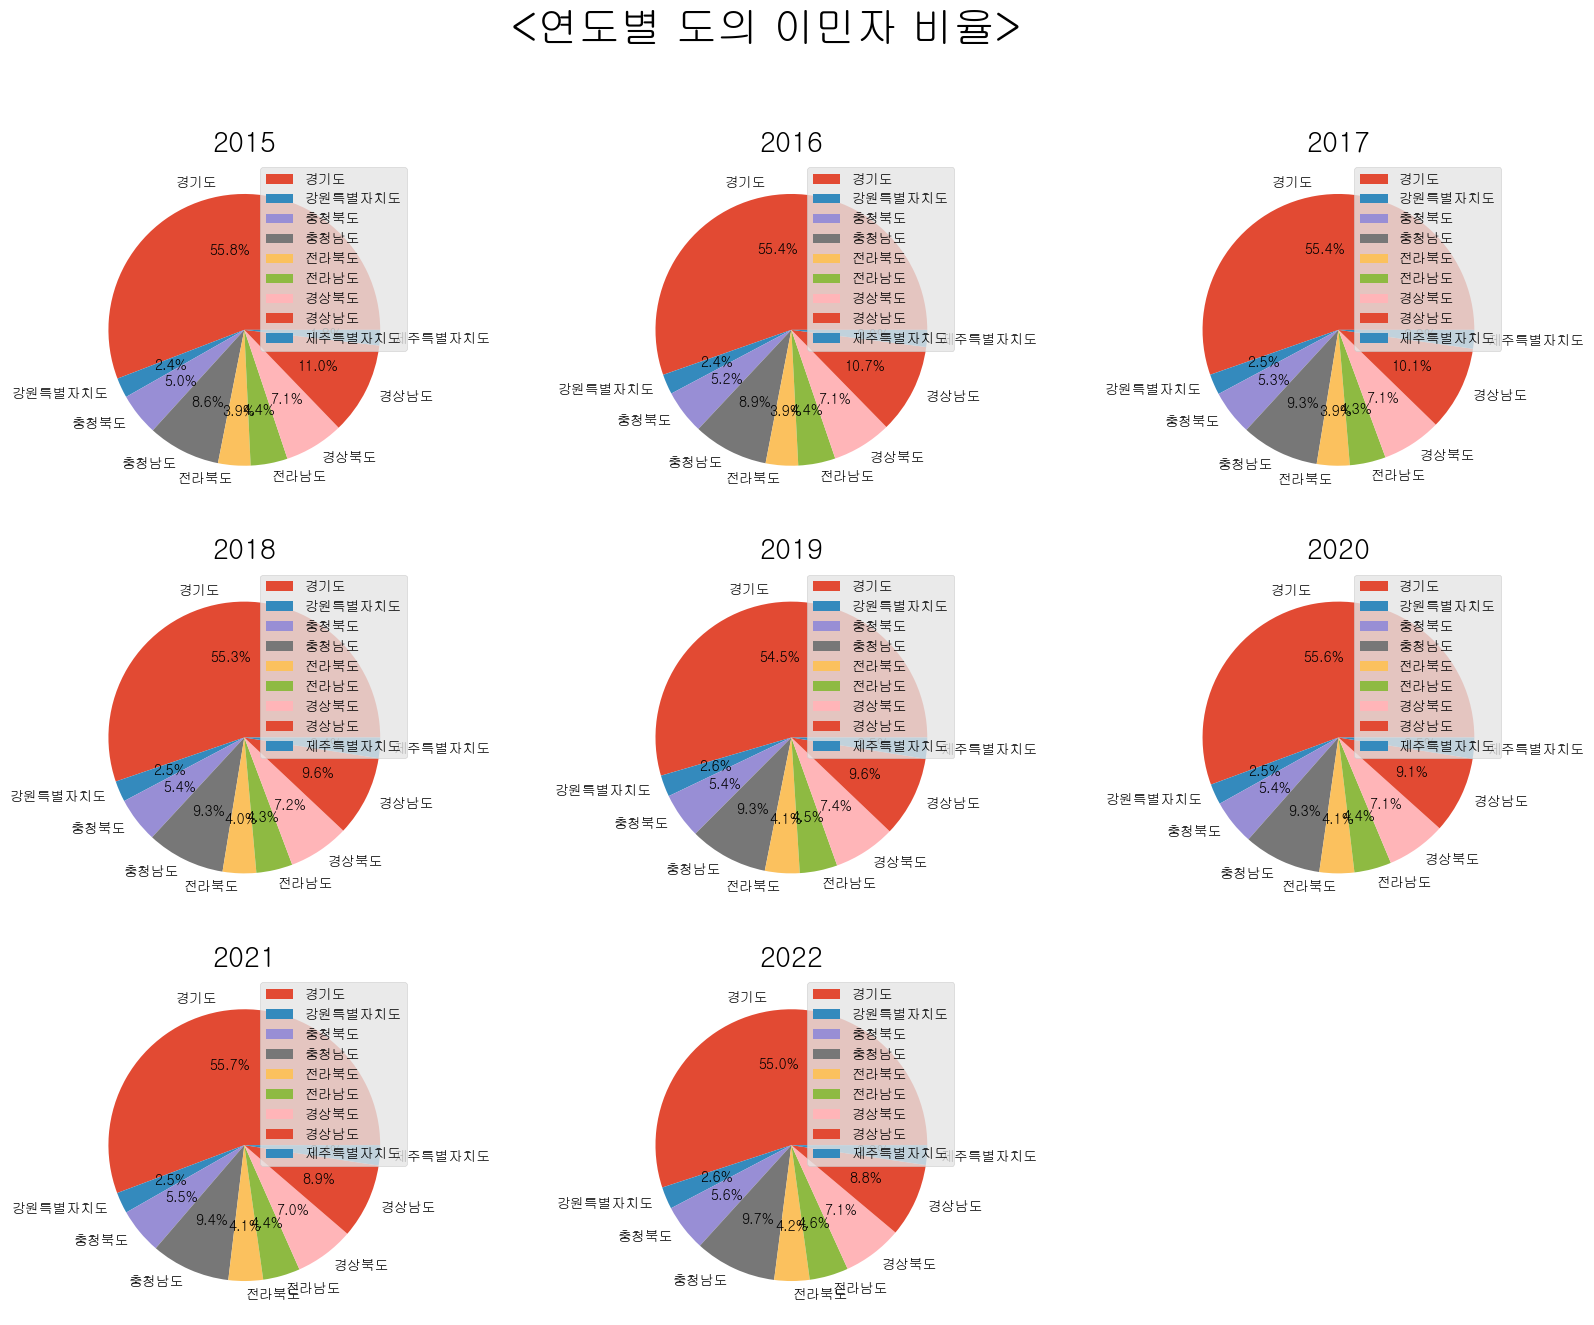

In [117]:
# 도 국적 취득자 + 미취득자 외국인 인구비율

plt.figure(figsize = (20, 15))
plt.suptitle('<연도별 도의 이민자 비율>', size = 30)
i = 1
for year in year_list:
    acqui_df = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '합계')].loc['경기도':'제주특별자치도']
    notacqui_df = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '합계')].loc['경기도':'제주특별자치도']
    df = acqui_df + notacqui_df
    plt.subplot(3, 3, i)
    plt.pie(df.values, labels = df.index, autopct = '%.1f%%')
    plt.title(year, size = 20)
    i += 1
    plt.legend(loc = 'upper right')
plt.show()

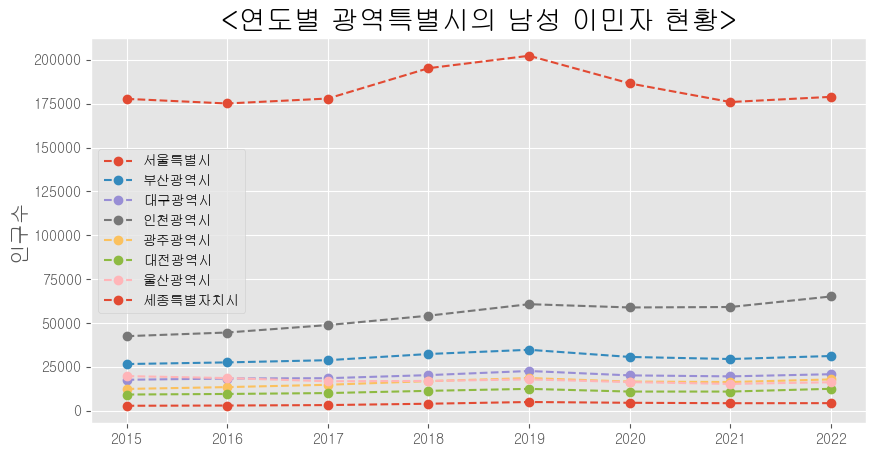

In [122]:
# 광역특별시 국적 취득자 + 미취득자 남자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for city in city_list:
    sum_list = []
    for year in year_list:
        num_acqui = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '남자')][city]
        num_notacqui = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '남자')][city]
        sum_list.append(num_acqui + num_notacqui)
    plt.plot(sum_list, 'o--', label = city_list[i])
    i += 1
plt.title('<연도별 광역특별시의 남성 이민자 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

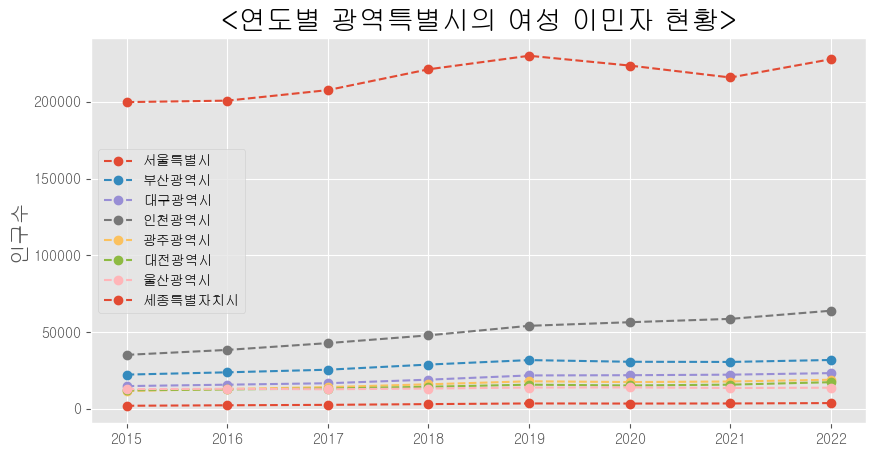

In [123]:
# 광역특별시 국적 취득자 + 미취득자 여자 외국인 인구수
plt.figure(figsize = (10, 5))
i = 0
for city in city_list:
    sum_list = []
    for year in year_list:
        num_acqui = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '여자')][city]
        num_notacqui = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '여자')][city]
        sum_list.append(num_acqui + num_notacqui)
    plt.plot(sum_list, 'o--', label = city_list[i])
    i += 1
plt.title('<연도별 광역특별시의 여성 이민자 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()   

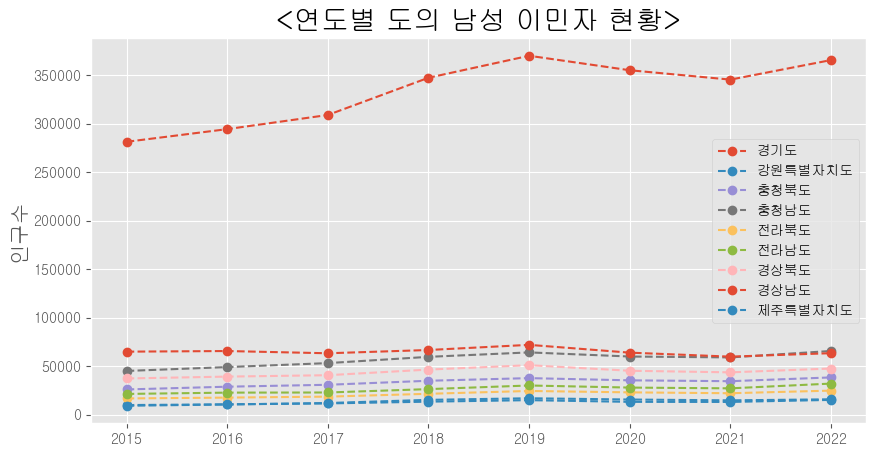

In [124]:
# 도 국적 취득자 + 미취득자 남자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for province in province_list:
    sum_list = []
    for year in year_list:
        num_acqui = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '남자')][province]
        num_notacqui = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '남자')][province]
        sum_list.append(num_acqui + num_notacqui)
    plt.plot(sum_list, 'o--', label = province_list[i])
    i += 1
plt.title('<연도별 도의 남성 이민자 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

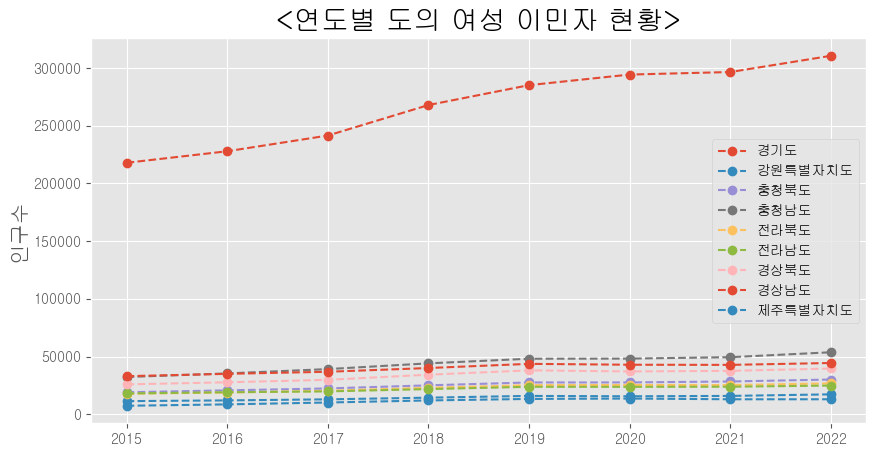

In [125]:
# 도 국적 취득자 + 미취득자 여자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for province in province_list:
    sum_list = []
    for year in year_list:
        num_acqui = fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '여자')][province]
        num_notacqui = fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '여자')][province]
        sum_list.append(num_acqui + num_notacqui)
    plt.plot(sum_list, 'o--', label = province_list[i])
    i += 1
plt.title('<연도별 도의 여성 이민자 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()  

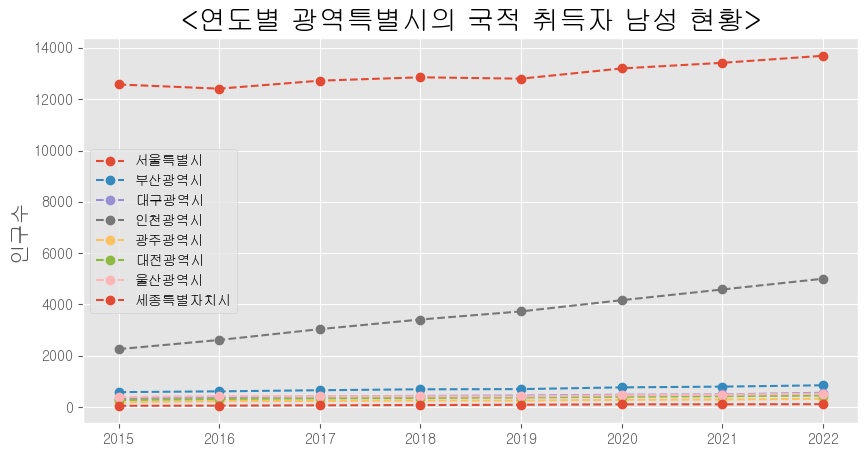

In [126]:
# 특별광역시별 한국국적을 취득한 남자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for city in city_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '남자')][city])
    plt.plot(sum_list, 'o--', label = city_list[i])
    i += 1
plt.title('<연도별 광역특별시의 국적 취득자 남성 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

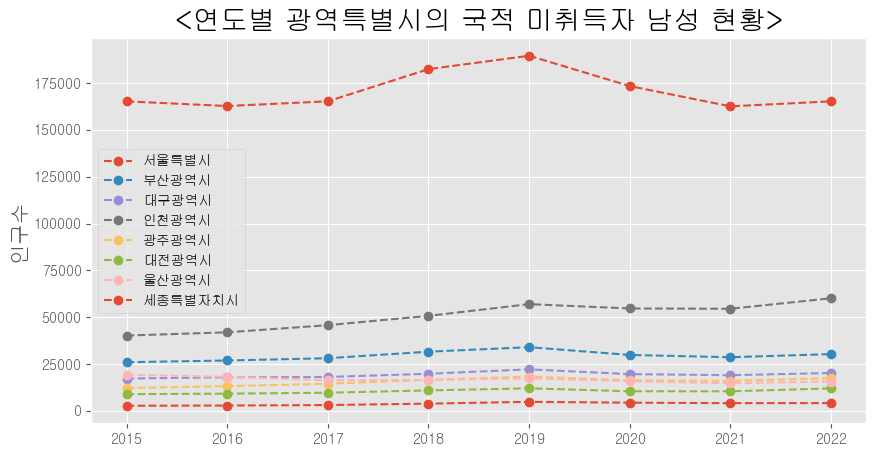

In [127]:
# 특별광역시별 국적을 가지지 않은 외국인 수

plt.figure(figsize = (10, 5))
i = 0
for city in city_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '남자')][city])
    plt.plot(sum_list, 'o--', label = city_list[i])
    i += 1
plt.title('<연도별 광역특별시의 국적 미취득자 남성 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()  

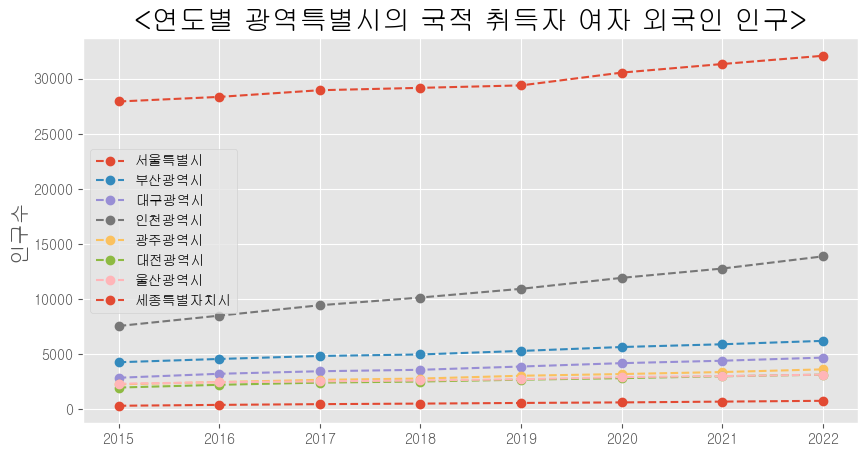

In [36]:
# 특별광역시별 한국국적을 취득한 여자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for city in city_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '여자')][city])
    plt.plot(sum_list, 'o--', label = city_list[i])
    i += 1
plt.title('<연도별 광역특별시의 국적 취득자 여성 인구 현황>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

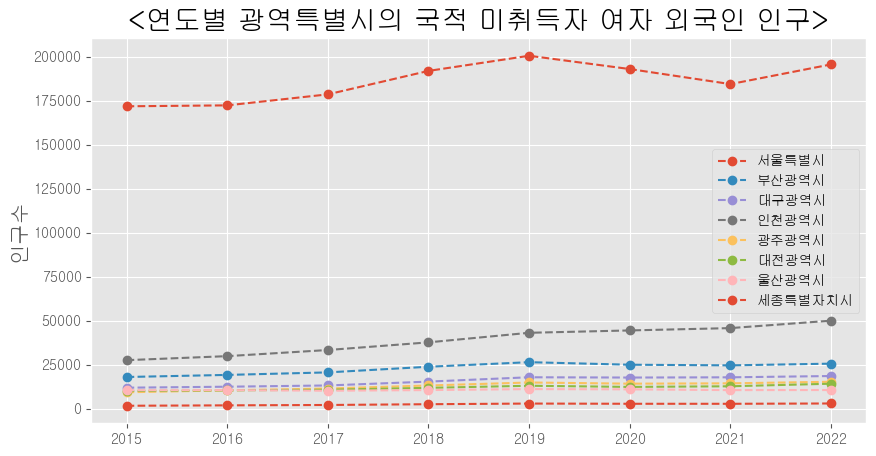

In [37]:
# 특별광역시별 국적을 가지지 않은 여자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for city in city_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '여자')][city])
    plt.plot(sum_list, 'o--', label = city_list[i])
    i += 1
plt.title('<연도별 광역특별시의 국적 미취득자 여자 외국인 인구>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()  

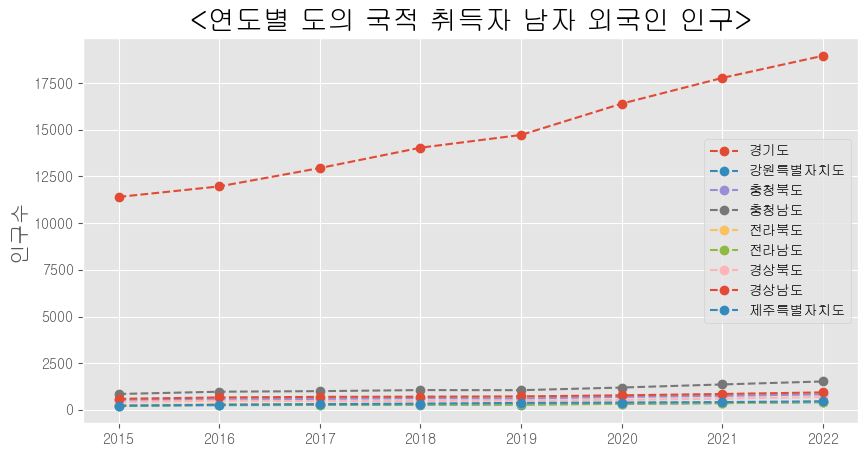

In [38]:
# 도별 한국국적을 취득한 남자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for province in province_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '남자')][province])
    plt.plot(sum_list, 'o--', label = province_list[i])
    i += 1
plt.title('<연도별 도의 국적 취득자 남자 외국인 인구>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

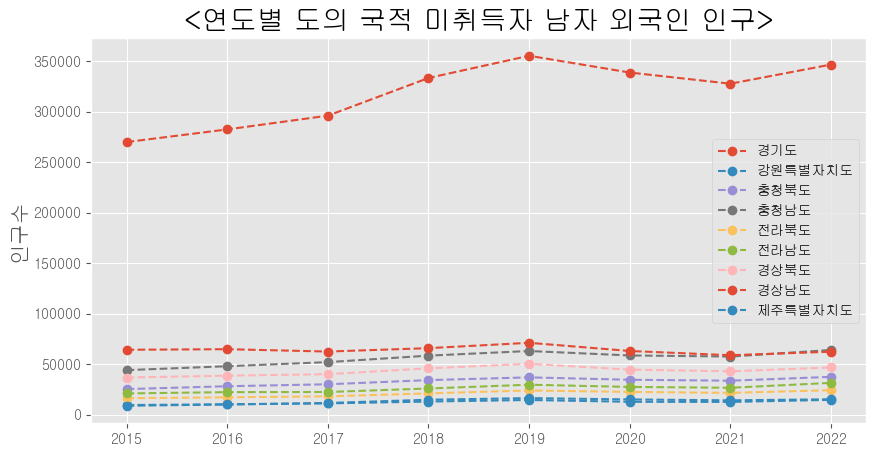

In [39]:
# 도별 한국국적을 가지지 않은 남자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for province in province_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '남자')][province])
    plt.plot(sum_list, 'o--', label = province_list[i])
    i += 1
plt.title('<연도별 도의 국적 미취득자 남자 외국인 인구>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

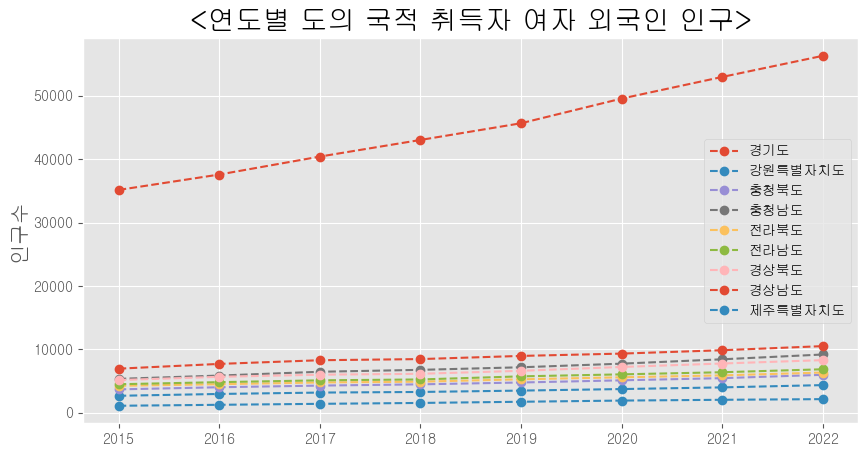

In [40]:
# 도별 한국국적을 취득한 여자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for province in province_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 취득한 자 (명)', '소계', '여자')][province])
    plt.plot(sum_list, 'o--', label = province_list[i])
    i += 1
plt.title('<연도별 도의 국적 취득자 여자 외국인 인구>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

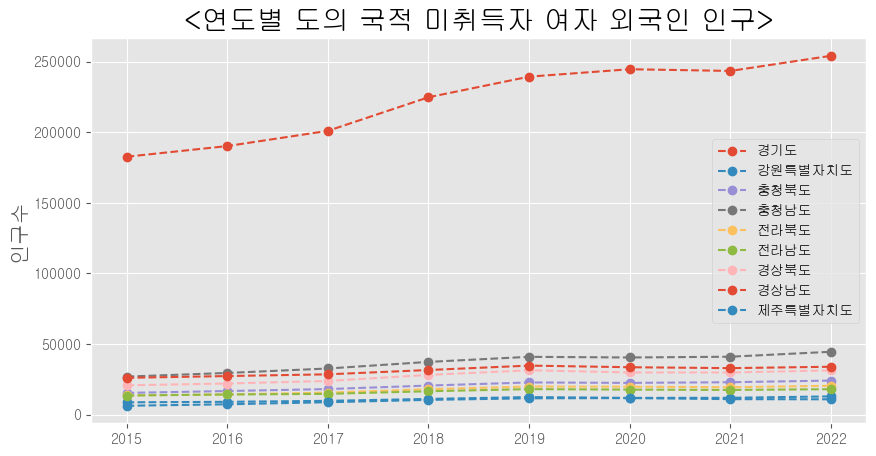

In [41]:
# 도별 한국국적을 가지지 않은 여자 외국인 인구수

plt.figure(figsize = (10, 5))
i = 0
for province in province_list:
    sum_list = []
    for year in year_list:
        sum_list.append(fpopulDF[(year, '한국국적을 가지지 않은 자 (명)', '소계', '여자')][province])
    plt.plot(sum_list, 'o--', label = province_list[i])
    i += 1
plt.title('<연도별 도의 국적 미취득자 여자 외국인 인구>', size = 20)
plt.style.use('ggplot')
plt.ylabel('인구수', size = 15)
plt.xticks(range(8), year_list)
plt.legend()
plt.show()    

## 시도별 연령별 외국인 주민현황 <hr>

In [191]:
file2 = '../DATA/시군구별_연령별__외국인_주민현황_계__20240206132100.xlsx'

In [192]:
ageDF = pd.read_excel(file2, index_col = [0, 1], header = [0, 1, 2])
ageDF.head()

연령별(1)                2016                                                     \
연령별(1)      한국국적을 가지지 않은 자                                        한국국적을 취득한 자   
연령별(1)                  소계  외국인근로자   결혼이민자    유학생  외국국적동포   기타외국인          소계   
합계 계               1413758  541673  159501  95963  235926  380695      159447   
   0 - 9세            43341       *       *      *     892   42448        4019   
   10 - 19세          37845     662     688  13755    1621   21119        4004   
   20 - 29세         391360  172541   43229  74258   37529   63803       24355   
   30 - 39세         364178  179332   52922   7189   41294   83441       48485   

연령별(1)                2017                  ...           2021          \
연령별(1)      한국국적을 가지지 않은 자                  ... 한국국적을 가지지 않은 자           
연령별(1)                  소계  외국인근로자   결혼이민자  ...         외국국적동포   기타외국인   
합계 계               1479247  495792  160653  ...         368581  554972   
   0 - 9세            42174       *       *  ...           1077   65131   
   10 - 19세          39379     553     614  ...           2054   28435   
   20 - 29세         405422  159224   39097  ...          26652   83597   
   30 - 39세         398025  176912   56498  ...          76542  156850   

연령별(1)                            2022                                  \
연령별(1)      한국국적을 취득한 자 한국국적을 가지지 않은 자                                   
연령별(1)               소계             소계  외국인근로자   결혼이민자     유학생  외국국적동포   
합계 계             210880        1752346  403139  175756  189397  397581   
   0 - 9세          6246          68333       *       *       *    3645   
   10 - 19세        7642          57831    1164      69   18461    8118   
   20 - 29세       15967         413641  123735   24539  152823   26262   
   30 - 39세       66544         483136  156628   67902   16349   77328   

연령별(1)                           
연령별(1)              한국국적을 취득한 자  
연령별(1)        기타외국인          소계  
합계 계         586473      223825  
   0 - 9세     64684        6292  
   10 - 19세   30019        8873  
   20 - 29세   86282       15016  
   30 - 39세  164929       67034  

[5 rows x 49 columns]

In [193]:
ageDF.columns

MultiIndex([('2016', '한국국적을 가지지 않은 자',     '소계'),
            ('2016', '한국국적을 가지지 않은 자', '외국인근로자'),
            ('2016', '한국국적을 가지지 않은 자',  '결혼이민자'),
            ('2016', '한국국적을 가지지 않은 자',    '유학생'),
            ('2016', '한국국적을 가지지 않은 자', '외국국적동포'),
            ('2016', '한국국적을 가지지 않은 자',  '기타외국인'),
            ('2016',    '한국국적을 취득한 자',     '소계'),
            ('2017', '한국국적을 가지지 않은 자',     '소계'),
            ('2017', '한국국적을 가지지 않은 자', '외국인근로자'),
            ('2017', '한국국적을 가지지 않은 자',  '결혼이민자'),
            ('2017', '한국국적을 가지지 않은 자',    '유학생'),
            ('2017', '한국국적을 가지지 않은 자', '외국국적동포'),
            ('2017', '한국국적을 가지지 않은 자',  '기타외국인'),
            ('2017',    '한국국적을 취득한 자',     '소계'),
            ('2018', '한국국적을 가지지 않은 자',     '소계'),
            ('2018', '한국국적을 가지지 않은 자', '외국인근로자'),
            ('2018', '한국국적을 가지지 않은 자',  '결혼이민자'),
            ('2018', '한국국적을 가지지 않은 자',    '유학생'),
            ('2018', '한국국적을 가지지 않은 자', '외국국적동포'),
            ('2018', '한국국적을 가지지 않은 자',  '기타외국인'),


In [194]:
agefemaleDF = pd.read_excel(file2, index_col = [0, 1], header = [0, 1, 2])
agefemaleDF.head()

연령별(1)                2016                                                     \
연령별(1)      한국국적을 가지지 않은 자                                        한국국적을 취득한 자   
연령별(1)                  소계  외국인근로자   결혼이민자    유학생  외국국적동포   기타외국인          소계   
합계 계               1413758  541673  159501  95963  235926  380695      159447   
   0 - 9세            43341       *       *      *     892   42448        4019   
   10 - 19세          37845     662     688  13755    1621   21119        4004   
   20 - 29세         391360  172541   43229  74258   37529   63803       24355   
   30 - 39세         364178  179332   52922   7189   41294   83441       48485   

연령별(1)                2017                  ...           2021          \
연령별(1)      한국국적을 가지지 않은 자                  ... 한국국적을 가지지 않은 자           
연령별(1)                  소계  외국인근로자   결혼이민자  ...         외국국적동포   기타외국인   
합계 계               1479247  495792  160653  ...         368581  554972   
   0 - 9세            42174       *       *  ...           1077   65131   
   10 - 19세          39379     553     614  ...           2054   28435   
   20 - 29세         405422  159224   39097  ...          26652   83597   
   30 - 39세         398025  176912   56498  ...          76542  156850   

연령별(1)                            2022                                  \
연령별(1)      한국국적을 취득한 자 한국국적을 가지지 않은 자                                   
연령별(1)               소계             소계  외국인근로자   결혼이민자     유학생  외국국적동포   
합계 계             210880        1752346  403139  175756  189397  397581   
   0 - 9세          6246          68333       *       *       *    3645   
   10 - 19세        7642          57831    1164      69   18461    8118   
   20 - 29세       15967         413641  123735   24539  152823   26262   
   30 - 39세       66544         483136  156628   67902   16349   77328   

연령별(1)                           
연령별(1)              한국국적을 취득한 자  
연령별(1)        기타외국인          소계  
합계 계         586473      223825  
   0 - 9세     64684        6292  
   10 - 19세   30019        8873  
   20 - 29세   86282       15016  
   30 - 39세  164929       67034  

[5 rows x 49 columns]

In [195]:
df = ageDF.xs(key = ('한국국적을 취득한 자', '소계'), level = [1, 2], axis = 1)
df.index

MultiIndex([(     '합계',        '계'),
            (     '합계',   '0 - 9세'),
            (     '합계', '10 - 19세'),
            (     '합계', '20 - 29세'),
            (     '합계', '30 - 39세'),
            (     '합계', '40 - 49세'),
            (     '합계', '50 - 59세'),
            (     '합계', '60 - 69세'),
            (     '합계',   '70세 이상'),
            (  '서울특별시',        '계'),
            ...
            (   '경상남도',   '70세 이상'),
            ('제주특별자치도',        '계'),
            ('제주특별자치도',   '0 - 9세'),
            ('제주특별자치도', '10 - 19세'),
            ('제주특별자치도', '20 - 29세'),
            ('제주특별자치도', '30 - 39세'),
            ('제주특별자치도', '40 - 49세'),
            ('제주특별자치도', '50 - 59세'),
            ('제주특별자치도', '60 - 69세'),
            ('제주특별자치도',   '70세 이상')],
           length=162)

In [196]:
df.index

MultiIndex([(     '합계',        '계'),
            (     '합계',   '0 - 9세'),
            (     '합계', '10 - 19세'),
            (     '합계', '20 - 29세'),
            (     '합계', '30 - 39세'),
            (     '합계', '40 - 49세'),
            (     '합계', '50 - 59세'),
            (     '합계', '60 - 69세'),
            (     '합계',   '70세 이상'),
            (  '서울특별시',        '계'),
            ...
            (   '경상남도',   '70세 이상'),
            ('제주특별자치도',        '계'),
            ('제주특별자치도',   '0 - 9세'),
            ('제주특별자치도', '10 - 19세'),
            ('제주특별자치도', '20 - 29세'),
            ('제주특별자치도', '30 - 39세'),
            ('제주특별자치도', '40 - 49세'),
            ('제주특별자치도', '50 - 59세'),
            ('제주특별자치도', '60 - 69세'),
            ('제주특별자치도',   '70세 이상')],
           length=162)

In [197]:
df.xs(key = ('10 - 19세'), level = 1)

연령별(1),2016,2017,2018,2019,2020,2021,2022
합계,4004,4354,4976,5724,6582,7642,8873
서울특별시,1201,1321,1467,1626,1787,1982,2210
부산광역시,141,142,157,169,186,211,233
대구광역시,68,73,93,118,146,152,189
인천광역시,324,360,421,491,570,693,813
광주광역시,49,53,57,67,81,88,104
대전광역시,84,81,80,84,83,110,110
울산광역시,48,50,54,65,79,93,125
세종특별자치시,15,16,21,20,32,35,39
경기도,1311,1436,1701,2009,2404,2826,3335


In [198]:
df.xs(key = ('20 - 29세'), level = 1)

연령별(1),2016,2017,2018,2019,2020,2021,2022
합계,24355,22622,19020,18783,17221,15967,15016
서울특별시,4363,3864,3248,2936,2720,2557,2381
부산광역시,1051,1005,866,940,886,811,726
대구광역시,800,748,603,612,562,522,522
인천광역시,1506,1537,1388,1351,1238,1077,1038
광주광역시,646,592,492,546,476,438,414
대전광역시,521,526,458,450,413,375,350
울산광역시,534,437,333,308,305,298,257
세종특별자치시,77,84,76,73,63,77,83
경기도,6468,6179,5477,5247,4852,4484,4205


In [199]:
df.xs(key = ('0 - 9세'), level = 1) + df.xs(key = ('20 - 29세'), level = 1)

연령별(1),2016,2017,2018,2019,2020,2021,2022
합계,28374,26616,23359,23499,22922,22213,21308
서울특별시,5455,4927,4336,4024,3936,3776,3485
부산광역시,1168,1132,999,1084,1034,977,885
대구광역시,903,856,716,737,693,656,653
인천광역시,1823,1889,1810,1829,1874,1829,1824
광주광역시,697,645,552,609,542,506,481
대전광역시,569,577,517,522,496,453,434
울산광역시,599,490,390,362,373,370,336
세종특별자치시,92,97,88,93,85,100,109
경기도,7845,7564,7058,7046,7166,7144,6936


In [200]:
# df.xs(key = ('0 - 9세'), level = 1).replace({'2018' : '*'}, 0)

In [201]:
somedf = df.xs(key = ('0 - 9세'), level = 1).replace({'2018' : '*'}, 0) + df.xs(key = ('10 - 19세'), level = 1) + df.xs(key = ('20 - 29세'), level = 1)
somedf.loc['합계']

연령별(1)
2016    32378
2017    30970
2018    28335
2019    29223
2020    29504
2021    29855
2022    30181
Name: 합계, dtype: object

In [202]:
year_list2 = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
district_list = city_list + province_list

In [203]:
# df = agemailDF.xs(key = ('한국국적을 취득한 자', '소계'), level = [1, 2], axis = 1)
# df.xs('0 - 9세', level = 1).replace({'2018' : '*'}, 0)

# somedf = df.xs(key = ('0 - 9세'), level = 1) + df.xs('10 - 19세', level = 1) + df.xs(key = ('20 - 29세'), level = 1)
# plt.figure(figsize = (10, 5))
# i = 0
# for district in district_list:
#     plt.plot(somedf.loc[district], 'o--', label = district_list[i])
#     i += 1

# plt.title('시도별 0 - 29세 외국인 남자 인구', size = 20)
# plt.ylabel('인구수 (단위:명)', size = 15)
# plt.legend()

# plt.figure(figsize = (10, 5))
# plt.bar(range(len(year_list2)), somedf.loc['합계'].values)
# plt.title('0 - 29세 외국인 남자 인구', size = 20)
# plt.ylabel('인구수 (단위:명)', size = 15)
# plt.xticks(range(len(year_list2)), year_list2)
# plt.show()

In [204]:
somedf

연령별(1),2016,2017,2018,2019,2020,2021,2022
합계,32378,30970,28335,29223,29504,29855,30181
서울특별시,6656,6248,5803,5650,5723,5758,5695
부산광역시,1309,1274,1156,1253,1220,1188,1118
대구광역시,971,929,809,855,839,808,842
인천광역시,2147,2249,2231,2320,2444,2522,2637
광주광역시,746,698,609,676,623,594,585
대전광역시,653,658,597,606,579,563,544
울산광역시,647,540,444,427,452,463,461
세종특별자치시,107,113,109,113,117,135,148
경기도,9156,9000,8759,9055,9570,9970,10271


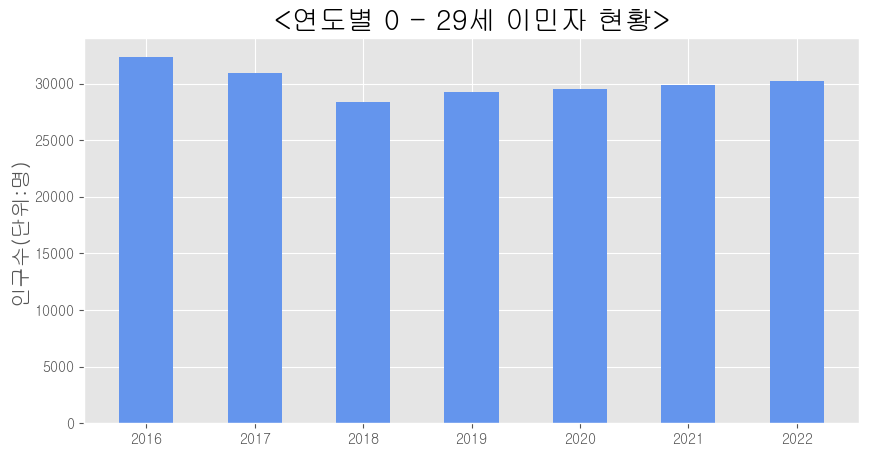

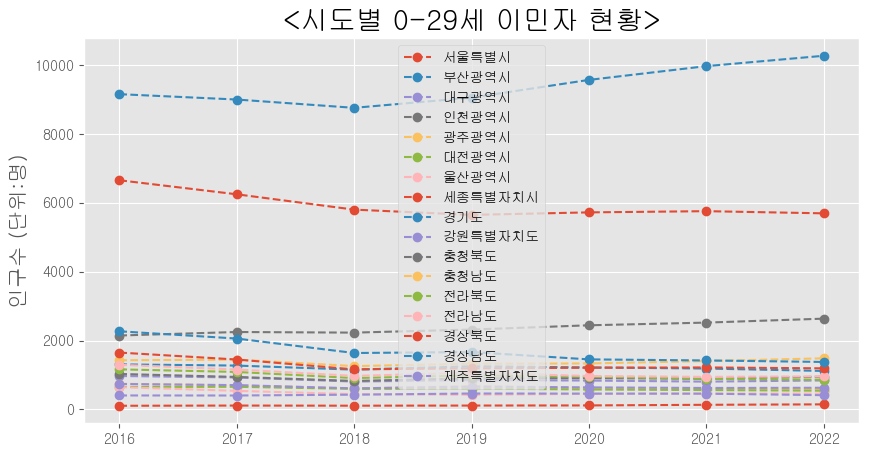

In [211]:
df = ageDF.xs(key = ('한국국적을 취득한 자', '소계'), level = [1, 2], axis = 1)
somedf = df.xs(key = ('0 - 9세'), level = 1) + df.xs(key = ('10 - 19세'), level = 1) + df.xs(key = ('20 - 29세'), level = 1)
plt.figure(figsize = (10, 5))
plt.bar(range(len(year_list2)), somedf.loc['합계'].values, width = 0.5, color = 'cornflowerblue')
plt.xticks(range(len(year_list2)), year_list2)
plt.ylabel('인구수(단위:명)', size = 15)
plt.title('<연도별 0 - 29세 이민자 현황>', size = 20)

plt.figure(figsize = (10, 5))
i = 0
for district in district_list:
    plt.plot(somedf.loc[district], 'o--', label = district_list[i])
    i += 1
plt.title('<시도별 0-29세 이민자 현황>', size = 20)
plt.ylabel('인구수 (단위:명)', size = 15)
plt.legend()
plt.show()

In [174]:
filename = '../DATA/시군구별_연령별__외국인_주민현황_계__20240206122511.csv'
df = pd.read_csv(filename)
df.head()

,행정구역(시군구)별(1),시점,거주외국인별(1),거주외국인별(2),계,0 - 9세,10 - 19세,20 - 29세,30 - 39세,40 - 49세,50 - 59세,60 - 69세,70세 이상
0,합계,2016,한국국적을 가지지 않은 자,소계,1413758,43341,37845,391360,364178,243927,212830,97838,22439
1,합계,2016,한국국적을 가지지 않은 자,외국인근로자,541673,*,662,172541,179332,94479,83008,10993,657
2,합계,2016,한국국적을 가지지 않은 자,결혼이민자,159501,*,688,43229,52922,34106,22659,5053,844
3,합계,2016,한국국적을 가지지 않은 자,유학생,95963,*,13755,74258,7189,672,69,17,*
4,합계,2016,한국국적을 가지지 않은 자,외국국적동포,235926,892,1621,37529,41294,37560,41789,61160,14081


In [178]:
df.columns

Index(['행정구역(시군구)별(1)', '시점', '거주외국인별(1)', '거주외국인별(2)', '계', '0 - 9세',
       '10 - 19세', '20 - 29세', '30 - 39세', '40 - 49세', '50 - 59세', '60 - 69세',
       '70세 이상'],
      dtype='object')

In [179]:
df.columns = ['행정구역별(1)', '시점', '거주외국인별(1)', '거주외국인별(2)', '계', '0 - 9세',
       '10 - 19세', '20 - 29세', '30 - 39세', '40 - 49세', '50 - 59세', '60 - 69세',
       '70세 이상']

In [180]:
df.columns

Index(['행정구역별(1)', '시점', '거주외국인별(1)', '거주외국인별(2)', '계', '0 - 9세', '10 - 19세',
       '20 - 29세', '30 - 39세', '40 - 49세', '50 - 59세', '60 - 69세', '70세 이상'],
      dtype='object')

In [181]:
for year in year_list2:
    df = df.replace({year, '*'}, 0)

df.head()

,행정구역별(1),시점,거주외국인별(1),거주외국인별(2),계,0 - 9세,10 - 19세,20 - 29세,30 - 39세,40 - 49세,50 - 59세,60 - 69세,70세 이상
0,합계,2016,한국국적을 가지지 않은 자,소계,1413758,43341,37845,391360,364178,243927,212830,97838,22439
1,합계,2016,한국국적을 가지지 않은 자,외국인근로자,541673,0,662,172541,179332,94479,83008,10993,657
2,합계,2016,한국국적을 가지지 않은 자,결혼이민자,159501,0,688,43229,52922,34106,22659,5053,844
3,합계,2016,한국국적을 가지지 않은 자,유학생,95963,0,13755,74258,7189,672,69,17,0
4,합계,2016,한국국적을 가지지 않은 자,외국국적동포,235926,892,1621,37529,41294,37560,41789,61160,14081


In [182]:
df

,행정구역별(1),시점,거주외국인별(1),거주외국인별(2),계,0 - 9세,10 - 19세,20 - 29세,30 - 39세,40 - 49세,50 - 59세,60 - 69세,70세 이상
0,합계,2016,한국국적을 가지지 않은 자,소계,1413758,43341,37845,391360,364178,243927,212830,97838,22439
1,합계,2016,한국국적을 가지지 않은 자,외국인근로자,541673,0,662,172541,179332,94479,83008,10993,657
2,합계,2016,한국국적을 가지지 않은 자,결혼이민자,159501,0,688,43229,52922,34106,22659,5053,844
3,합계,2016,한국국적을 가지지 않은 자,유학생,95963,0,13755,74258,7189,672,69,17,0
4,합계,2016,한국국적을 가지지 않은 자,외국국적동포,235926,892,1621,37529,41294,37560,41789,61160,14081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,제주특별자치도,2022,한국국적을 가지지 않은 자,결혼이민자,2954,0,0,494,1233,798,293,89,45
878,제주특별자치도,2022,한국국적을 가지지 않은 자,유학생,1816,0,46,1588,170,10,0,0,0
879,제주특별자치도,2022,한국국적을 가지지 않은 자,외국국적동포,2241,16,41,91,384,346,475,597,291
880,제주특별자치도,2022,한국국적을 가지지 않은 자,기타외국인,9724,1102,552,1386,2801,2094,1309,395,85


In [206]:
df.to_csv('../DATA/시군구별_연령별__외국인_주민현황_계.csv')

In [207]:
file3 = '../DATA/시군구별_연령별__외국인_주민현황_남__20240206060413.xlsx'

In [208]:
agemaleDF = pd.read_excel(file3, index_col = [0, 1], header = [0, 1, 2])
agemaleDF.head()

연령별(1)                2016                                                    \
연령별(1)      한국국적을 가지지 않은 자                                       한국국적을 취득한 자   
연령별(1)                  소계  외국인근로자  결혼이민자    유학생  외국국적동포   기타외국인          소계   
합계 계                815467  416357  28728  41861  119263  209258       32816   
   0 - 9세            22295       *      *      *     484   21811        1942   
   10 - 19세          18013     497      *   5506     826   11184        1799   
   20 - 29세         230714  144268   1813  31704   18113   34816        4478   
   30 - 39세         237318  152351   9394   4217   23449   47907        5876   

연령별(1)                2017                 ...           2021          \
연령별(1)      한국국적을 가지지 않은 자                 ... 한국국적을 가지지 않은 자           
연령별(1)                  소계  외국인근로자  결혼이민자  ...         외국국적동포   기타외국인   
합계 계                845663  387579  30745  ...         190232  293756   
   0 - 9세            21499       *      *  ...            575   32951   
   10 - 19세          18645     384      *  ...           1048   14497   
   20 - 29세         236600  133762   1716  ...          13090   42409   
   30 - 39세         254872  151219  10346  ...          42687   85613   

연령별(1)                            2022                                        \
연령별(1)      한국국적을 취득한 자 한국국적을 가지지 않은 자                                         
연령별(1)               소계             소계  외국인근로자  결혼이민자    유학생  외국국적동포   기타외국인   
합계 계              43467         968784  323442  39174  86309  207432  312427   
   0 - 9세          2998          34594       *      *      *    1808   32783   
   10 - 19세        3535          28052     698      *   7503    4134   15717   
   20 - 29세        2954         230038  102318   1373  69507   13100   43740   
   30 - 39세        8267         294234  138176  13372   8467   43710   90509   

연령별(1)                   
연령별(1)      한국국적을 취득한 자  
연령별(1)               소계  
합계 계              46193  
   0 - 9세          3045  
   10 - 19세        4196  
   20 - 29세        2827  
   30 - 39세        8213  

[5 rows x 49 columns]

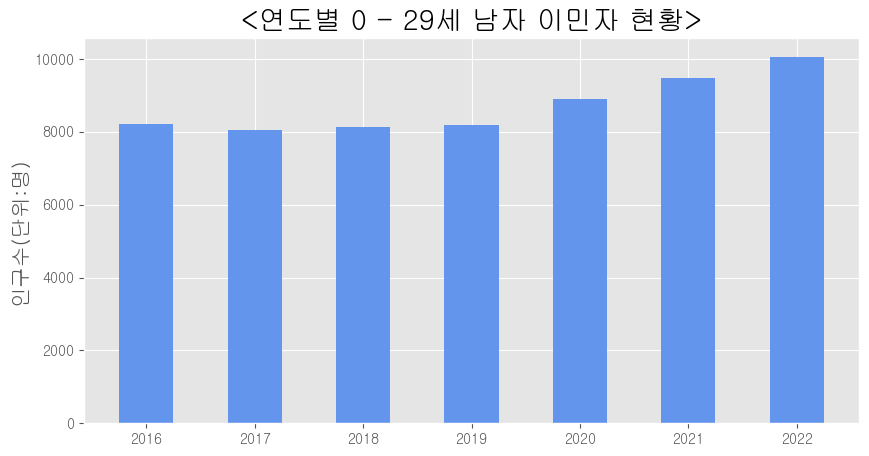

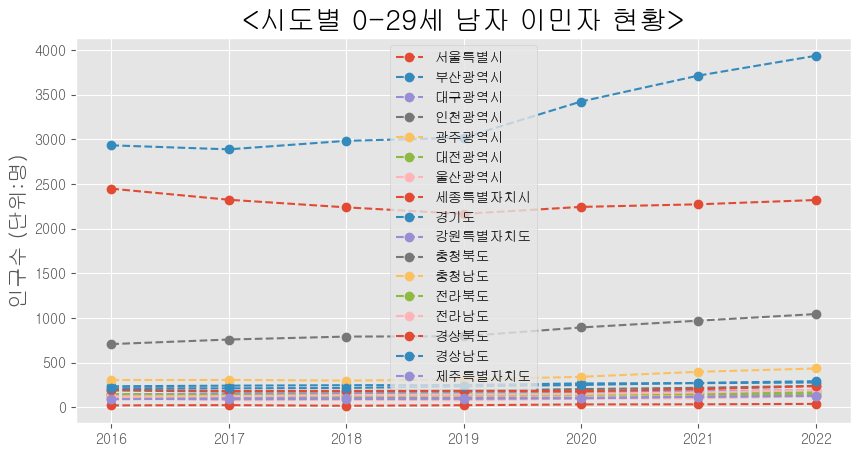

In [210]:
df = agemaleDF.xs(key = ('한국국적을 취득한 자', '소계'), level = [1, 2], axis = 1)
somedf = df.xs(key = ('0 - 9세'), level = 1).replace({'2018':'*'}, 0) + df.xs(key = ('10 - 19세'), level = 1) + df.xs(key = ('20 - 29세'), level = 1)
plt.figure(figsize = (10, 5))
plt.bar(range(len(year_list2)), somedf.loc['합계'].values, width = 0.5, color = 'cornflowerblue')
plt.xticks(range(len(year_list2)), year_list2)
plt.ylabel('인구수(단위:명)', size = 15)
plt.title('<연도별 0 - 29세 남자 이민자 현황>', size = 20)

plt.figure(figsize = (10, 5))
i = 0
for district in district_list:
    plt.plot(somedf.loc[district], 'o--', label = district_list[i])
    i += 1
plt.title('<시도별 0-29세 남자 이민자 현황>', size = 20)
plt.ylabel('인구수 (단위:명)', size = 15)
plt.legend()
plt.show()